In [1]:
%matplotlib inline

import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

In [2]:
dfRookieRBs = pd.read_csv('final-csv-data/NFL-Rookies-RBs.csv')
dfRookieWRs = pd.read_csv('final-csv-data/NFL-Rookies-WRs.csv')
dfRookieCBs = pd.read_csv('final-csv-data/NFL-Rookies-CBs.csv')
dfRookieQBs = pd.read_csv('final-csv-data/NFL-Rookies-QBs.csv')
dfTheseTeams = pd.read_csv('final-csv-data/NFL-Curr-Teams.csv')
dfNBATeams = pd.read_csv('final-csv-data/NBA-Curr-Teams.csv')

dfFYRBs = pd.read_csv('final-csv-data/NFL-FY-RBs.csv')
dfFYWRs = pd.read_csv('final-csv-data/NFL-FY-WRs.csv')
dfFYCBs = pd.read_csv('final-csv-data/NFL-FY-CBs.csv')
dfFYQBs = pd.read_csv('final-csv-data/NFL-FY-QBs.csv')
dfOldTeams = pd.read_csv('final-csv-data/NFL-Prev-Teams.csv')
dfOldNBATeams = pd.read_csv('final-csv-data/NBA-Prev-Teams.csv')

In [3]:
dfNBATeams.head()

,Team,Wins,Losses,PythWins,PF,PA,2PA,2P%,3PA,3P%,...,AST/TO,TS%,PERAdd,PERLoss,oRPMAdd,dRPMadd,oRPMLoss,dRPMLoss,TankIncent,NumStar
0,Hawks,24,58,27,103.4,108.8,54.5,0.495,31.0,0.360,...,1.53,54.7,27,17,-1.54,-0.16,0.84,-2.63,2,0
1,Celtics,55,27,51,104.0,100.4,54.7,0.491,30.4,0.377,...,1.60,55.2,25,10,3.14,-0.08,-0.50,-0.50,0,3
2,Nets,28,54,31,106.6,110.3,51.1,0.500,35.7,0.356,...,1.56,55.1,15,20,-1.39,2.42,-1.54,-0.16,3,0
3,Hornets,36,46,42,108.2,108.0,59.4,0.487,27.2,0.369,...,1.70,54.9,12,17,-2.16,-1.49,-1.11,1.75,1,0
4,Bulls,27,55,23,102.9,110.0,57.8,0.478,31.1,0.355,...,1.68,52.9,22,14,-1.18,-1.70,0.59,-1.23,3,0


In [4]:
dfRookieWRs.head()

,Name,Position,Height,Weight,Seasons-Col,Games-Col,Rec-Col,Yards-Col,Yards-game-Col,Yards-rec-Col,TDs-Col,40 yd dash,Vertical,DC Pos,Draft Pos
0,Corey Coleman,WR,71,194,3,34,173,3009,88.5,17.4,33,4.42,40.5,2.0,15
1,Will Fuller,WR,72,186,3,30,144,2512,83.7,17.4,30,4.32,33.5,3.0,21
2,Josh Doctson,WR,74,202,4,45,214,3177,70.6,14.8,34,4.50,41.0,4.0,22
3,Laquon Treadwell,WR,74,221,3,35,202,2393,68.4,11.8,21,4.52,33.0,4.0,23
4,Sterling Shepard,WR,70,194,4,49,233,3482,71.1,14.9,26,4.48,41.0,2.0,40


In [107]:
rookRBTest = dfRookieRBs.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
rookWRTest = dfRookieWRs.iloc[:, [2,3,4,5,6,7,8,9,10,11,12]]
rookCBTest = dfRookieCBs.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
rookQBTest = dfRookieQBs.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
theseTeamsTest = dfTheseTeams.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
NBATeamsTest = dfNBATeams.iloc[:, [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
FYRBTest = dfFYRBs.iloc[:,[2,3,6,7,8,9,10,11,12,13,14,15,18,19,20,21,22,23,24,25,26]]
FYWRTest = dfFYWRs.iloc[:,[2,3,6,7,8,9,10,11,12,15,16,17,18,19,20]]
FYCBTest = dfFYCBs.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
FYQBTest = dfFYQBs.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
oldTeamsTest = dfOldTeams.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]]
oldNBATeamsTest = dfOldNBATeams.iloc[:, [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]

rookRBNames = dfRookieRBs.iloc[:, 0]
rookWRNames = dfRookieWRs.iloc[:, 0]
rookCBNames = dfRookieCBs.iloc[:, 0]
rookQBNames = dfRookieQBs.iloc[:, 0]
theseTeamsNames = dfTheseTeams.iloc[:,0]
NBATeamsNames = dfNBATeams.iloc[:,0]
FYRBNames = dfFYRBs.iloc[:,0]
FYWRNames = dfFYWRs.iloc[:,0]
FYCBNames = dfFYCBs.iloc[:,0]
FYQBNames = dfFYQBs.iloc[:,0]
oldTeamsNames = dfOldTeams.iloc[:,0]
oldNBATeamsNames= dfOldNBATeams.iloc[:,0]
oldNBATeamsNames.head()

0        2016 Hawks
1      2016 Celtics
2    2016 Cavaliers
3    2016 Mavericks
4      2016 Nuggets
Name: Team, dtype: object

Draft Position and FY Yards: slope = -2.394730652256139 , intercept = 681.7802633031631 , r_value = -0.40987036519406933 , p_value = 2.5198741623345605e-05 , std_err = 0.5411125298669183


Text(0.5,1,'r = -0.41, p = 0.0, rsquared = 0.168')

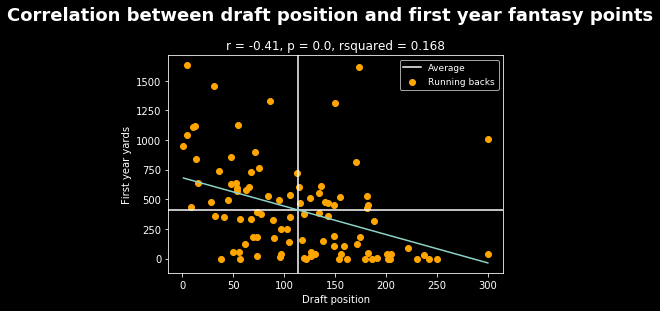

In [6]:
plt.style.use('dark_background')
yardsAllRBs, ax = plt.subplots()

ax.scatter(dfFYRBs['DraftPos'], dfFYRBs['Yards-FY'], color = 'orange', label = "Running backs")
ax.axvline(x = np.mean(dfFYRBs['DraftPos']), color = 'white')
ax.axhline(y = np.mean(dfFYRBs['Yards-FY']), label = "Average", color = 'white')
yardsAllRBs.suptitle("Correlation between draft position and first year fantasy points", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Draft position")
ax.set_ylabel("First year yards")

ax.plot(np.unique(dfFYRBs['DraftPos']), np.poly1d(np.polyfit(dfFYRBs['DraftPos'], dfFYRBs['Yards-FY'],1))(np.unique(dfFYRBs['DraftPos'])))

ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})

slope, intercept, r_value, p_value, std_err = linregress(dfFYRBs['DraftPos'], dfFYRBs['Yards-FY'])
print("Draft Position and FY Yards: slope =", slope, ", intercept =", intercept, ", r_value =", r_value, ", p_value =", p_value, ", std_err =", std_err)

rsquared = r_value**2
rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquared, 3))

ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
#yardsAllRBs.savefig('fantasyGraphs/CollegetoNFL-correlationDepth2Points.png', dpi = 400, bbox_inches = 'tight')

In [7]:
colArr = dfFYRBs.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
fyArr = dfFYRBs.iloc[:, [18,19,20,21,22,23,24,25,26]]
rSquareArr = []
colUse = []
fyUse = []
for i in colArr:
    for j in fyArr:
        
        #plt.style.use('dark_background')

        #yardsAllRBs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfFYRBs[i], dfFYRBs[j])
        rsquaredArr1 = r_value**2
        rSquareArr.append(rsquaredArr1)
        colUse.append(i)
        fyUse.append(j)

        #ax.scatter(dfFYRBs[i], dfFYRBs[j], color = 'orange', label = "Running backs")
        #ax.axvline(x = np.mean(dfFYRBs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYRBs[j]), label = "Average", color = 'white')
        #yardsAllRBs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYRBs[i]), np.poly1d(np.polyfit(dfFYRBs[i], dfFYRBs[j],1))(np.unique(dfFYRBs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllRBs.savefig('newGraphs/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
for n,m,f in zip(rSquareArr,colUse,fyUse):
    print(n,m,f)


0.05528518698600745 Height Yards-FY
0.06526897693154879 Height Carries-FY
0.025119950314819183 Height Avg-Carry-FY
0.060371001501238565 Height Avg-Game-FY
0.0372034927816575 Height TDs-FY
0.017135789994813355 Height Rec-FY
0.028248507717333456 Height RecYards-FY
0.004376097397941009 Height RecTDs-FY
0.05191370105542137 Height FPoints-FY
0.14496118960909143 Weight Yards-FY
0.1613277097038876 Weight Carries-FY
0.009292698725717419 Weight Avg-Carry-FY
0.1492626535731243 Weight Avg-Game-FY
0.13882326046786939 Weight TDs-FY
0.012693163786153355 Weight Rec-FY
0.02054663779026474 Weight RecYards-FY
0.001433932684913756 Weight RecTDs-FY
0.1307043699535264 Weight FPoints-FY
0.0009464672490580392 Seasons-Col Yards-FY
0.0016789165014740905 Seasons-Col Carries-FY
0.00013924305966213468 Seasons-Col Avg-Carry-FY
0.003394342220109997 Seasons-Col Avg-Game-FY
6.566709409975365e-06 Seasons-Col TDs-FY
0.00315268006861694 Seasons-Col Rec-FY
0.00664182798983914 Seasons-Col RecYards-FY
0.0035971712226302204

[[7.216230435102737e-08, 'Games-Col', 'TDs-FY'], [2.733512591014989e-07, 'TDs-Col', 'RecTDs-FY'], [5.292552054294322e-07, 'Vertical', 'Rec-FY'], [9.94519264992243e-07, 'Vertical', 'RecYards-FY'], [6.566709409975365e-06, 'Seasons-Col', 'TDs-FY'], [7.959737810210049e-06, 'RecTDs-Col', 'FPoints-FY'], [2.986410324277194e-05, 'Games-Col', 'Avg-Carry-FY'], [9.775446463983966e-05, 'RecYards-Col', 'Avg-Game-FY'], [0.00010779998369877221, 'Rec-Col', 'Avg-Game-FY'], [0.00011553403820636653, 'Rec-Col', 'Yards-FY'], [0.00013924305966213468, 'Seasons-Col', 'Avg-Carry-FY'], [0.0002228883568260164, 'Rec-Col', 'Carries-FY'], [0.00028303499680328216, 'RecYards-Col', 'FPoints-FY'], [0.00029390095247692734, 'Games-Col', 'RecTDs-FY'], [0.0004538334501331124, 'Games-Col', 'Rec-FY'], [0.0009183053974318123, 'Games-Col', 'FPoints-FY'], [0.0009464672490580392, 'Seasons-Col', 'Yards-FY'], [0.0010506304390171307, 'RecYards-Col', 'Yards-FY'], [0.0011569422532050943, 'RecTDs-Col', 'TDs-FY'], [0.001159437468963034

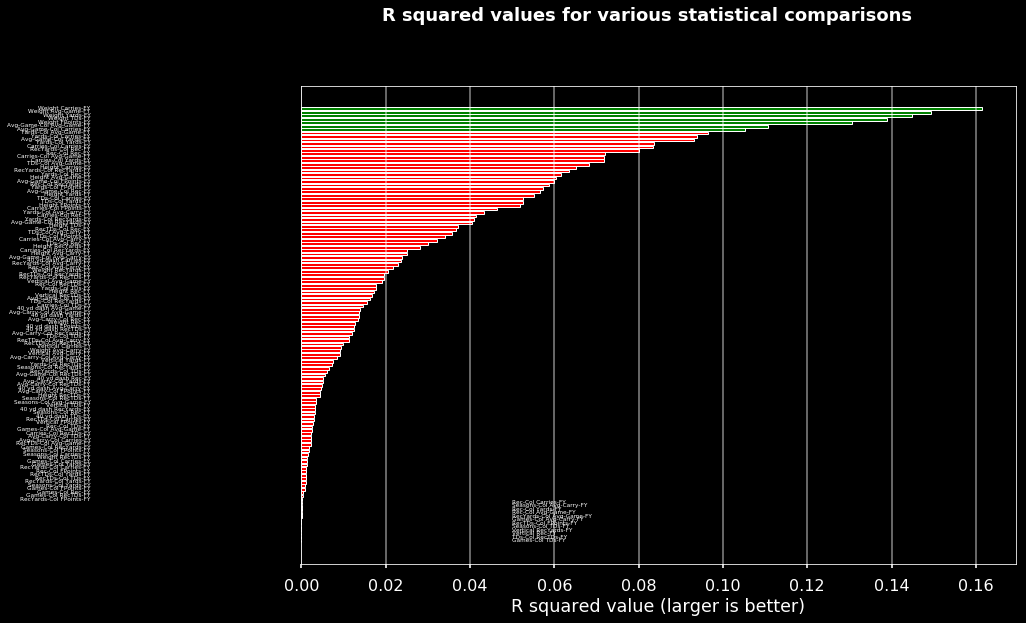

In [8]:
plt.style.use('seaborn-poster')

compareStats, ax = plt.subplots()

statsGraph = []
for i in rSquareArr:
    statsGraph.append(float(i))
combinedStats = [[i,j,k] for i,j,k in zip(statsGraph,colUse,fyUse)]


sortedRSquared = sorted(combinedStats, key = itemgetter(0))
print(sortedRSquared)

sortedRSquaredData = [row[0] for row in sortedRSquared]
y_pos = np.arange(len(sortedRSquaredData))

colorList = []

for i in sortedRSquaredData:
    if i < 0.1:
        colorList.append('red')
    elif i > 0.1:
        colorList.append('green')
        
ax.barh(y_pos,sortedRSquaredData,color = colorList, edgeColor = 'white', linewidth=1)

labels = [row[1]+' '+row[2] for row in sortedRSquared]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .05, height, label, ha='left', fontsize = 'xx-small', va='bottom', color = 'white')
    elif rect.get_y() >=11:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize = 'xx-small',color='white')

compareStats.suptitle("R squared values for various statistical comparisons", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("R squared value (larger is better)")
ax.grid(alpha = .5)
compareStats.savefig('fantasyGraphs/RBRSquared.png', dpi = 400, bbox_inches = 'tight')

In [9]:
train, test = train_test_split(dfFYRBs, test_size = 0.25, random_state = 99)

xtrainRB = train[['Height','Weight','Seasons-Col','Games-Col','Yards-Col', 'Carries-Col', 'Avg-Carry-Col', 'Avg-Game-Col', 'TDs-Col', 'Rec-Col', 'RecYards-Col', 'RecTDs-Col', '40 yd dash', 'Vertical']]
ytrainRB = train[['FPoints-FY']].astype(int)

xtestRB = test[['Height','Weight','Seasons-Col','Games-Col','Yards-Col', 'Carries-Col', 'Avg-Carry-Col', 'Avg-Game-Col', 'TDs-Col', 'Rec-Col', 'RecYards-Col', 'RecTDs-Col', '40 yd dash', 'Vertical']]
ytestRB = test[['FPoints-FY']].astype(int)

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(xtrainRB,ytrainRB)
#knn.score(xtestRB,ytestRB)
#print(knn.kneighbors(xtrain, return_distance=False))

In [10]:
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(xtrainRB,ytrainRB)

y_predLinRB = linReg.predict(xtestRB)
linR2RB = abs(1/(r2_score(ytestRB,y_predLinRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLinRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLinRB))

cvScoreLin = cross_val_score(linReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLin.mean(), cvScoreLin.std()*2))
print(linR2RB)

Mean squared error: 8373.522
Variance score: -0.586
Accuracy (cross validation score): -3.70 (+/- 2.90)
1.7074171594381056


In [11]:
ridgeReg = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeReg.fit(xtrainRB,ytrainRB)

y_predRidgeRB = ridgeReg.predict(xtestRB)
ridgeR2RB = abs(1/(r2_score(ytestRB,y_predRidgeRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predRidgeRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predRidgeRB))

cvScoreRidge = cross_val_score(ridgeReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidge.mean(), cvScoreRidge.std()*2))
print(ridgeR2RB)

Mean squared error: 8576.609
Variance score: -0.624
Accuracy (cross validation score): -0.96 (+/- 0.87)
1.602208917066145


In [12]:
lassoReg = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoReg.fit(xtrainRB,ytrainRB)

y_predLassoRB = lassoReg.predict(xtestRB)
lassoR2RB = abs(1/(r2_score(ytestRB,y_predLassoRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLassoRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLassoRB))

cvScoreLasso = cross_val_score(lassoReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLasso.mean(), cvScoreLasso.std()*2))

print(lassoR2RB)

Mean squared error: 8216.291
Variance score: -0.556
Accuracy (cross validation score): -0.84 (+/- 1.63)
1.7988672925396803


In [13]:
logReg = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logReg.fit(xtrainRB,ytrainRB)

y_predLogRB = logReg.predict(xtestRB)

print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLogRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLogRB))

C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 8373.160
Variance score: -0.586


In [14]:
linear_rbs = linReg.predict(rookRBTest)
for i,j in zip(linear_rbs, rookRBNames):
    print(i,j)

[130.79393869] Leonard Fournette
[26.10269338] Christian McCaffery
[80.21408663] Joe Mixon
[81.13445956] Dalvin Cook
[110.17020928] Alvin Kamara
[168.53177788] Kareem Hunt
[114.58633295] D'Onta Foreman
[63.77052937] James Conner
[155.15921315] Samaje Perine
[28.87533469] Joe Williams
[40.74497696] Jamaal Williams
[64.73687575] Wayne Gallman
[123.0705703] Marlon Mack
[67.23112531] Brian Hill
[75.26709475] Jeremy McNichols
[5.52023394] T.J. Logan
[78.73390459] Aaron Jones
[103.52362872] Elijah McGuire
[161.20976276] Elijah Hood


In [15]:
ridge_rbs = ridgeReg.predict(rookRBTest)
for i,j in zip(ridge_rbs, rookRBNames):
    print(i,j)

[129.73132173] Leonard Fournette
[28.79427083] Christian McCaffery
[75.55824032] Joe Mixon
[85.46814068] Dalvin Cook
[113.53439855] Alvin Kamara
[175.31454575] Kareem Hunt
[109.76017294] D'Onta Foreman
[68.51718758] James Conner
[158.21688033] Samaje Perine
[24.09908853] Joe Williams
[42.0201349] Jamaal Williams
[62.83718823] Wayne Gallman
[119.91957551] Marlon Mack
[61.50333916] Brian Hill
[78.62250701] Jeremy McNichols
[4.13962845] T.J. Logan
[89.61595439] Aaron Jones
[107.14910789] Elijah McGuire
[158.25780538] Elijah Hood


In [16]:
lasso_rbs = lassoReg.predict(rookRBTest)
for i,j in zip(lasso_rbs, rookRBNames):
    print(i,j)

128.4195968781883 Leonard Fournette
25.225028886702717 Christian McCaffery
67.61600152305422 Joe Mixon
85.83297659026792 Dalvin Cook
107.4693574301518 Alvin Kamara
174.38905964726905 Kareem Hunt
110.35395006936784 D'Onta Foreman
76.32440223856439 James Conner
154.25042206024716 Samaje Perine
27.5838244494293 Joe Williams
47.11168118161186 Jamaal Williams
64.8699320169261 Wayne Gallman
116.54063467364915 Marlon Mack
59.21474440645113 Brian Hill
78.23325282944867 Jeremy McNichols
6.172413239128588 T.J. Logan
106.21918667753312 Aaron Jones
101.50178926027218 Elijah McGuire
154.24604593554528 Elijah Hood


In [17]:
log_rbs = logReg.predict(rookRBTest)
for i,j in zip(log_rbs, rookRBNames):
    print(i,j)

204 Leonard Fournette
103 Christian McCaffery
111 Joe Mixon
54 Dalvin Cook
233 Alvin Kamara
242 Kareem Hunt
51 D'Onta Foreman
14 James Conner
293 Samaje Perine
0 Joe Williams
118 Jamaal Williams
71 Wayne Gallman
82 Marlon Mack
7 Brian Hill
0 Jeremy McNichols
0 T.J. Logan
71 Aaron Jones
59 Elijah McGuire
148 Elijah Hood


In [18]:
averageProd = []
for i,j,h in zip(linear_rbs,ridge_rbs,lasso_rbs):
    averageProd.append(float((i*linR2RB+j*ridgeR2RB+h*lassoR2RB)/(linR2RB+ridgeR2RB+lassoR2RB)))

combinedAvg = [[i,j] for i,j in zip(rookRBNames, averageProd)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

#this average is raw talent average, got rid of 16,17 in FYRB struct (draftpos and dcpos)

[['T.J. Logan', 5.316879576838], ['Christian McCaffery', 26.637815427820094], ['Joe Williams', 26.92254763568383], ['Jamaal Williams', 43.386837179034686], ['Brian Hill', 62.611854273912336], ['Wayne Gallman', 64.18791825645637], ['James Conner', 69.67988213277661], ['Joe Mixon', 74.31764720443593], ['Jeremy McNichols', 77.36395490629538], ['Dalvin Cook', 84.14816047513708], ['Aaron Jones', 91.82537547432544], ['Elijah McGuire', 103.9487548816664], ['Alvin Kamara', 110.27428301682596], ["D'Onta Foreman", 111.58231383410322], ['Marlon Mack', 119.78290046137995], ['Leonard Fournette', 129.6245801805052], ['Samaje Perine', 155.79819353653176], ['Elijah Hood', 157.83176975715506], ['Kareem Hunt', 172.72164017533163]]


Draft position and FY yards: slope = -0.18941615598455921 , intercept = 44.138599865915346 , r_value = -0.5160804262009123 , p_value = 3.895204588483495e-08 , std_err = 0.03175662262833821


Text(0.5,1,'r = -0.516, p = 0.0, rsquared = 0.266')

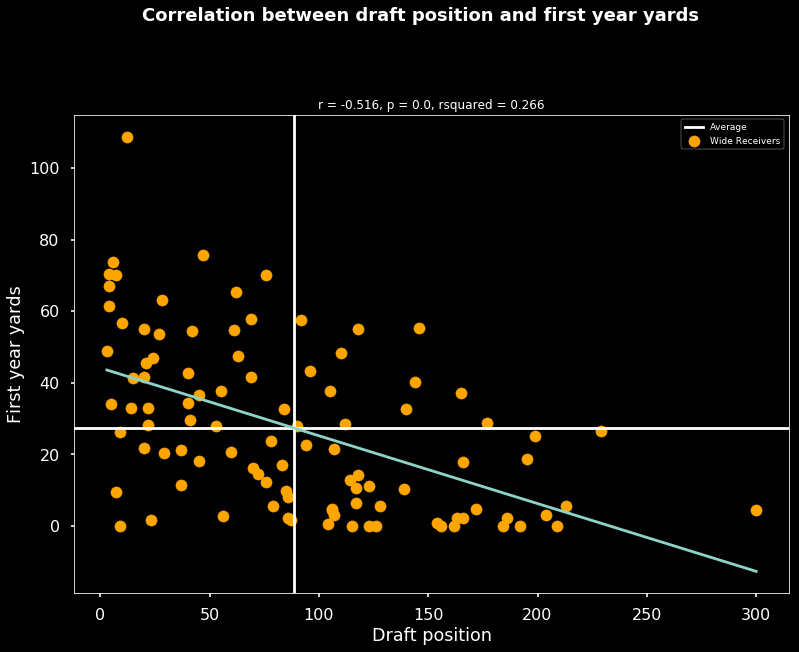

In [19]:
plt.style.use('dark_background')
yardsAllWRs, ax = plt.subplots()

ax.scatter(dfFYWRs['Draft Pos'], dfFYWRs['Yards-game-FY'], color = 'orange', label = "Wide Receivers")
ax.axvline(x = np.mean(dfFYWRs['Draft Pos']), color = 'white')
ax.axhline(y = np.mean(dfFYWRs['Yards-game-FY']), label = "Average", color = 'white')
yardsAllWRs.suptitle("Correlation between draft position and first year yards", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Draft position")
ax.set_ylabel("First year yards")

ax.plot(np.unique(dfFYWRs['Draft Pos']), np.poly1d(np.polyfit(dfFYWRs['Draft Pos'], dfFYWRs['Yards-game-FY'],1))(np.unique(dfFYWRs['Draft Pos'])))

ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})

slope, intercept, r_value, p_value, std_err = linregress(dfFYWRs['Draft Pos'], dfFYWRs['Yards-game-FY'])
print("Draft position and FY yards: slope =", slope, ", intercept =", intercept, ", r_value =", r_value, ", p_value =", p_value, ", std_err =", std_err)

rsquared = r_value**2
rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquared, 3))

ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
#yardsAllWRs.savefig('fantasyGraphs/CollegetoNFL-correlationDepth2Yards.png', dpi = 400, bbox_inches = 'tight')

In [20]:
colArr = dfFYWRs.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]]
fyArr = dfFYWRs.iloc[:, [15,16,17,18,19,20]]
rSquareArr = []
colUse = []
fyUse = []
for i in colArr:
    for j in fyArr:
        
        #plt.style.use('dark_background')

        #yardsAllWRs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfFYWRs[i], dfFYWRs[j])
        rsquaredArr1 = r_value**2
        rSquareArr.append(rsquaredArr1)
        colUse.append(i)
        fyUse.append(j)

        #ax.scatter(dfFYWRs[i], dfFYWRs[j], color = 'orange', label = "Wide Receivers")
        #ax.axvline(x = np.mean(dfFYWRs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYWRs[j]), label = "Average", color = 'white')
        #yardsAllWRs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYWRs[i]), np.poly1d(np.polyfit(dfFYWRs[i], dfFYWRs[j],1))(np.unique(dfFYWRs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllWRs.savefig('newGraphsWR/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
for n,m,f in zip(rSquareArr,colUse,fyUse):
    print(n,m,f)

0.0006636107645400228 Height Rec-FY
0.016606679731983355 Height Yards-FY
0.013325104497297544 Height Yards-game-FY
0.04678494944436042 Height Yards-rec-FY
0.021083851301245665 Height TDs-FY
0.017201353180227155 Height FPoints-FY
0.0033681547679585222 Weight Rec-FY
0.018544853352740927 Weight Yards-FY
0.011541854183119142 Weight Yards-game-FY
0.02661185007980835 Weight Yards-rec-FY
0.03289257207967263 Weight TDs-FY
0.022184076282878298 Weight FPoints-FY
0.0701309746156708 Seasons-Col Rec-FY
0.08425154318996948 Seasons-Col Yards-FY
0.09404181444132301 Seasons-Col Yards-game-FY
0.014064141045843566 Seasons-Col Yards-rec-FY
0.11179568233984342 Seasons-Col TDs-FY
0.10730297392854203 Seasons-Col FPoints-FY
0.013234643637698669 Games-Col Rec-FY
0.020510308382586728 Games-Col Yards-FY
0.024693355154917072 Games-Col Yards-game-FY
0.0010664498702823452 Games-Col Yards-rec-FY
0.040633202821557794 Games-Col TDs-FY
0.033347923521467204 Games-Col FPoints-FY
0.09338903785045805 Rec-Col Rec-FY
0.06908

[[1.0532726938051072e-05, 'Vertical', 'Yards-rec-FY'], [0.0003253170450966731, 'Yards-rec-Col', 'TDs-FY'], [0.00045647216796450215, 'Vertical', 'TDs-FY'], [0.0005689067188725413, '40 yd dash', 'Yards-FY'], [0.0006607677741412944, '40 yd dash', 'Rec-FY'], [0.0006636107645400228, 'Height', 'Rec-FY'], [0.0007895710478955059, 'Yards-rec-Col', 'FPoints-FY'], [0.0010268496064003197, '40 yd dash', 'Yards-game-FY'], [0.0010664498702823452, 'Games-Col', 'Yards-rec-FY'], [0.0011609511168516394, 'Yards-rec-Col', 'Yards-game-FY'], [0.003014356165401052, '40 yd dash', 'FPoints-FY'], [0.0030568377749551024, 'Yards-rec-Col', 'Yards-FY'], [0.0033681547679585222, 'Weight', 'Rec-FY'], [0.0047773838806199394, 'TDs-Col', 'TDs-FY'], [0.004869850822431399, 'Vertical', 'FPoints-FY'], [0.005340527743221424, 'Rec-Col', 'TDs-FY'], [0.0057169617134142856, '40 yd dash', 'TDs-FY'], [0.006625073058078031, 'Yards-rec-Col', 'Yards-rec-FY'], [0.007548819566675053, 'Vertical', 'Yards-game-FY'], [0.008011102121075872, '

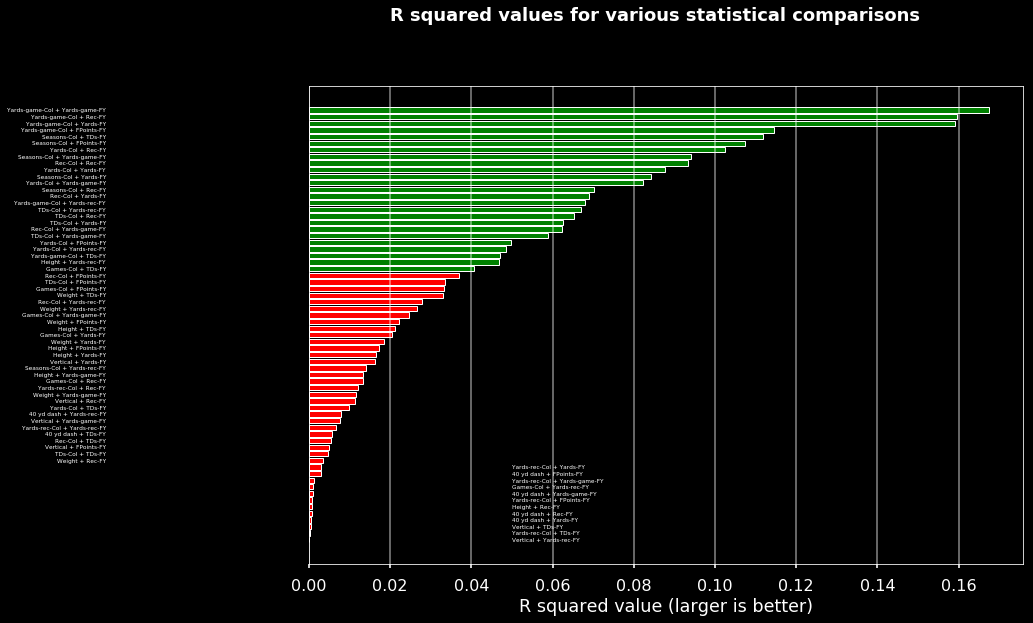

In [21]:
plt.style.use('seaborn-poster')

compareStatsWR, ax = plt.subplots()

statsGraph = []
for i in rSquareArr:
    statsGraph.append(float(i))
combinedStats = [[i,j,k] for i,j,k in zip(statsGraph,colUse,fyUse)]


sortedRSquared = sorted(combinedStats, key = itemgetter(0))
print(sortedRSquared)

sortedRSquaredData = [row[0] for row in sortedRSquared]
y_pos = np.arange(len(sortedRSquaredData))

colorList = []

for i in sortedRSquaredData:
    if i < np.mean(sortedRSquaredData):
        colorList.append('red')
    elif i > np.mean(sortedRSquaredData):
        colorList.append('green')
        
ax.barh(y_pos,sortedRSquaredData,height=0.8,color = colorList, edgeColor = 'white', linewidth=1)

labels = [row[1]+' + '+row[2] for row in sortedRSquared]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .05, height, label, ha='left', va='bottom', fontsize='xx-small',color = 'white')
    elif rect.get_y() >=11:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize='xx-small',color='white')

compareStatsWR.suptitle("R squared values for various statistical comparisons", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("R squared value (larger is better)")
ax.grid(alpha = .5)
compareStatsWR.savefig('fantasyGraphs/WRRSquared.png', dpi = 400, bbox_inches = 'tight')

In [22]:
train, test = train_test_split(dfFYWRs, test_size = 0.25, random_state = 99)

xtrainWR = train[['Height','Weight','Seasons-Col','Games-Col','Rec-Col', 'Yards-Col', 'Yards-game-Col', 'Yards-rec-Col', 'TDs-Col', '40 yd dash', 'Vertical']]
ytrainWR = train[['FPoints-FY']].astype(int)

xtestWR = test[['Height','Weight','Seasons-Col','Games-Col','Rec-Col', 'Yards-Col', 'Yards-game-Col', 'Yards-rec-Col', 'TDs-Col', '40 yd dash', 'Vertical']]
ytestWR = test[['FPoints-FY']].astype(int)

In [23]:
linRegWR = linear_model.LinearRegression(fit_intercept = False)
linRegWR.fit(xtrainWR,ytrainWR)

y_predLinWR = linRegWR.predict(xtestWR)
linR2WR=abs(1/r2_score(ytestWR,y_predLinWR))

print("Mean squared error: %.3f"%mean_squared_error(ytestWR, y_predLinWR))
print("Variance score: %.3f"%r2_score(ytestWR,y_predLinWR))

cvScoreLin = cross_val_score(linRegWR,xtestWR,ytestWR,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLin.mean(), cvScoreLin.std()*2))

Mean squared error: 2205.430
Variance score: 0.269
Accuracy (cross validation score): -1.02 (+/- 2.79)


In [24]:
ridgeReg = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeReg.fit(xtrainWR,ytrainWR)

y_predRidgeWR = ridgeReg.predict(xtestWR)
ridgeR2WR=abs(1/r2_score(ytestWR,y_predRidgeWR))

print("Mean squared error: %.3f"%mean_squared_error(ytestWR, y_predRidgeWR))
print("Variance score: %.3f"%r2_score(ytestWR,y_predRidgeWR))

cvScoreRidge = cross_val_score(ridgeReg,xtestWR,ytestWR,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidge.mean(), cvScoreRidge.std()*2))

Mean squared error: 2484.175
Variance score: 0.177
Accuracy (cross validation score): -0.59 (+/- 1.48)


In [25]:
lassoReg = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoReg.fit(xtrainWR,ytrainWR)

y_predLassoWR = lassoReg.predict(xtestWR)
lassoR2WR=abs(1/r2_score(ytestWR,y_predLassoWR))
print("Mean squared error: %.3f"%mean_squared_error(ytestWR, y_predLassoWR))
print("Variance score: %.3f"%r2_score(ytestWR,y_predLassoWR))

cvScoreLasso = cross_val_score(lassoReg,xtestWR,ytestWR,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLasso.mean(), cvScoreLasso.std()*2))

Mean squared error: 2654.550
Variance score: 0.121
Accuracy (cross validation score): -0.60 (+/- 1.39)


In [26]:
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(ytestWR)
logReg = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logReg.fit(xtrainWR,ytrainWR)

y_predLogWR = logReg.predict(xtestWR)

print("Mean squared error: %.3f"%mean_squared_error(ytestWR, y_predLogWR))
print("Variance score: %.3f"%r2_score(ytestWR,y_predLogWR))

#cvScoreLog = cross_val_score(logReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
#print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLog.mean(), cvScoreLog.std()*2))

Mean squared error: 3529.680
Variance score: -0.169


C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
linear_wrs = linRegWR.predict(rookWRTest)
for i,j in zip(linear_wrs, rookWRNames):
    print(i,j)

[49.17100255] Corey Coleman
[45.83394996] Will Fuller
[35.19243675] Josh Doctson
[60.18590045] Laquon Treadwell
[38.81093841] Sterling Shepard
[49.70052609] Michael Thomas
[70.55565104] Tyler Boyd
[-40.05842789] Braxton Miller
[10.81989358] Leonte Carroo
[34.42682245] Chris Moore
[25.66526471] Malcolm Mitchell
[25.47880662] Ricardo Louis
[48.41176114] Pharoh Cooper
[19.95707881] Demarcus Robinson
[54.83669039] Tajae Sharpe
[49.7820951] Jordan Payton
[4.98387785] Trevor Davis
[73.0392178] Rashard Higgins
[9.24819477] Kolby Listenbee
[23.93783565] Cody Core
[30.9205702] Aaron Burbridge
[21.78524162] Demarcus Ayers


In [28]:
ridge_wrs = ridgeReg.predict(rookWRTest)
for i,j in zip(ridge_wrs, rookWRNames):
    print(i,j)

[53.93434189] Corey Coleman
[48.75499798] Will Fuller
[35.66644427] Josh Doctson
[59.38473279] Laquon Treadwell
[43.68146086] Sterling Shepard
[41.98098284] Michael Thomas
[69.69441876] Tyler Boyd
[-29.35112668] Braxton Miller
[39.6246357] Leonte Carroo
[38.23917585] Chris Moore
[28.75676126] Malcolm Mitchell
[17.6387139] Ricardo Louis
[56.72509678] Pharoh Cooper
[32.5142184] Demarcus Robinson
[53.95434501] Tajae Sharpe
[44.76882242] Jordan Payton
[11.37438937] Trevor Davis
[75.27304569] Rashard Higgins
[26.71867163] Kolby Listenbee
[22.43757217] Cody Core
[37.69630459] Aaron Burbridge
[29.40623049] Demarcus Ayers


In [29]:
lasso_wrs = lassoReg.predict(rookWRTest)
for i,j in zip(lasso_wrs, rookWRNames):
    print(i,j)

60.330985268787174 Corey Coleman
57.87121218965984 Will Fuller
47.73266745656305 Josh Doctson
61.284266168336856 Laquon Treadwell
47.2802078226467 Sterling Shepard
37.16404255613113 Michael Thomas
66.76891386515283 Tyler Boyd
-5.5505232575929035 Braxton Miller
65.9275519144776 Leonte Carroo
36.350260244459555 Chris Moore
36.71417016189987 Malcolm Mitchell
17.328669929726658 Ricardo Louis
56.24952939620536 Pharoh Cooper
48.681328473100095 Demarcus Robinson
55.2754293206894 Tajae Sharpe
40.357945246069335 Jordan Payton
28.29340883339292 Trevor Davis
73.25336448934559 Rashard Higgins
39.31034028468734 Kolby Listenbee
25.892773846619736 Cody Core
40.53775810741482 Aaron Burbridge
26.758873811396874 Demarcus Ayers


In [30]:
log_wrs = logReg.predict(rookWRTest)
for i,j in zip(log_wrs, rookWRNames):
    print(i,j)

59 Corey Coleman
75 Will Fuller
6 Josh Doctson
133 Laquon Treadwell
86 Sterling Shepard
0 Michael Thomas
66 Tyler Boyd
15 Braxton Miller
67 Leonte Carroo
4 Chris Moore
0 Malcolm Mitchell
20 Ricardo Louis
10 Pharoh Cooper
0 Demarcus Robinson
26 Tajae Sharpe
0 Jordan Payton
0 Trevor Davis
7 Rashard Higgins
0 Kolby Listenbee
20 Cody Core
105 Aaron Burbridge
11 Demarcus Ayers


In [31]:
averageProd = []
for i,j,h in zip(linear_wrs,ridge_wrs,lasso_wrs):
    averageProd.append(float((i*linR2WR+j*ridgeR2WR+h*lassoR2WR)/(linR2WR+ridgeR2WR+lassoR2WR)))

combinedAvg = [[i,j] for i,j in zip(rookWRNames, averageProd)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

[['Braxton Miller', -20.42020006214037], ['Trevor Davis', 17.97975382732201], ['Ricardo Louis', 19.14128958428486], ['Cody Core', 24.376290925062854], ['Demarcus Ayers', 26.560278165196692], ['Kolby Listenbee', 28.961604508271424], ['Malcolm Mitchell', 31.84536113097708], ['Chris Moore', 36.550250371612215], ['Demarcus Robinson', 37.46989876904372], ['Aaron Burbridge', 37.60679242660489], ['Josh Doctson', 41.2357184745465], ['Michael Thomas', 41.34079525346177], ['Jordan Payton', 43.75046530844538], ['Sterling Shepard', 44.34827547325192], ['Leonte Carroo', 45.926528692373694], ['Will Fuller', 52.42385892214152], ['Pharoh Cooper', 54.75393604408827], ['Tajae Sharpe', 54.76051126931948], ['Corey Coleman', 55.93819124636839], ['Laquon Treadwell', 60.445598518138596], ['Tyler Boyd', 68.50102337557195], ['Rashard Higgins', 73.85454108625495]]


In [32]:
NFLProd = dfFYWRs.iloc[:,[0,15,16,17,18,19,20]]
dfRookieRBProd = pd.read_csv('final-csv-data/NFL-Rookies-RBs-Preds.csv')
dfRookieWRProd = pd.read_csv('final-csv-data/NFL-Rookies-WR-Preds.csv')
dfRookieCBProd = pd.read_csv('final-csv-data/NFL-Rookies-CBs-Preds.csv')
dfRookieQBProd = pd.read_csv('final-csv-data/NFL-Rookies-QBs-Preds.csv')
NFLProdRB = dfFYRBs.iloc[:,[0,18,19,20,21,22,23,24,25,26]]
NFLProdCB = dfFYCBs.iloc[:,[0,16,17,18,19,20,21,22,23,24]]
NFLProdQB = dfFYQBs.iloc[:,[0,19,20,21,22,23,24,25,26,27,28,29,30]]

RookWRProd = dfRookieWRProd.iloc[:, [0,6,7,8,9,10,15]]

prodArrs = [NFLProd['FPoints-FY'],RookWRProd['FPoints']]
prodArrsNames = [NFLProd['Name'],RookWRProd['Name']]
combProd = pd.concat(prodArrs)
combProdName = pd.concat(prodArrsNames)
#for i,j in zip (combProdName,combProd):
    #print(i,j)
    

RookRBProd = dfRookieRBProd.iloc[:,[0,6,7,8,9,10,11,12,13,18]]
prodArrsRB = [NFLProdRB['FPoints-FY'], RookRBProd['FPoints']]
prodArrsRBNames = [NFLProdRB['Name'], RookRBProd['Player']]
combProdRB = pd.concat(prodArrsRB)
combProdRBName = pd.concat(prodArrsRBNames)
#for i,j in zip (RookUse,RookNames):
    #print(i,j)
    
RookCBProd = dfRookieCBProd.iloc[:,[0,5,6,7,8,9,10,11,16,17]]
prodArrsCB = [NFLProdCB['RProdScale'],RookCBProd['RProdScale']]
prodArrsCBNames = [NFLProdCB['Player'], RookCBProd['Player']]
combProdCB = pd.concat(prodArrsCB)
combProdCBName = pd.concat(prodArrsCBNames)
#for i,j in zip (combProdCBName,combProdCB):
    #print(i,j)
    
RookQBProd = dfRookieQBProd.iloc[:,[0,5,6,7,8,9,10,11,12,13,14,19,20]]
prodArrsQB = [NFLProdQB['FPoints-FY'],RookQBProd['FPoints']]
prodArrsQBNames = [NFLProdQB['Player'], RookQBProd['Player']]
combProdQB = pd.concat(prodArrsQB)
combProdQBName = pd.concat(prodArrsQBNames)
#for i,j in zip(combProdQBName,combProdQB):
    #print(i,j)

[['John Ross', 0.0], ['Demarcus Robinson', 0.0], ['Kolby Listenbee', 0.0], ['Vince Mayle', 0.0], ['Tony Lippett', 0.0], ['Kenny Bell', 0.0], ['Kaelin Clay', 0.0], ['Shaquelle Evans', 0.0], ['Quincy Enunwa', 0.0], ['Jordan Lasley', 0.0], ['Marquez Valdes-Scantling', 0.0], ['Jordan Payton', 0.3], ['Jalen Saunders', 0.7], ['Shelton Gibson', 1.1], ['Sammie Coates', 1.1], ['Laquon Treadwell', 1.5], ['Darren Waller', 1.8], ['Geremy Davis', 2.1], ['Cody Latimer', 2.3], ['Jermaine Kearse', 3.1], ['Chris Moore', 4.6], ['Josh Doctson', 6.6], ["J'Mon Moore", 7.0], ['Amara Darboh', 7.1], ['Rashard Higgins', 7.7], ['ArDarius Stewart', 8.2], ['Trevor Davis', 8.4], ['Aaron Burbridge', 8.8], ['Leonte Carroo', 8.9], ['Mike Williams', 9.5], ['Josh Huff', 9.8], ['Kevin Norwood', 10.2], ['Pharoh Cooper', 10.6], ['Demarcus Ayers', 11.3], ['Josh Malone', 12.3], ['Braxton Miller', 15.9], ['Josh Reynolds', 16.4], ['Antonio Brown', 16.7], ['Devin Smith', 17.5], ['Bruce Ellington', 18.2], ['Justin Hardy', 19.4]

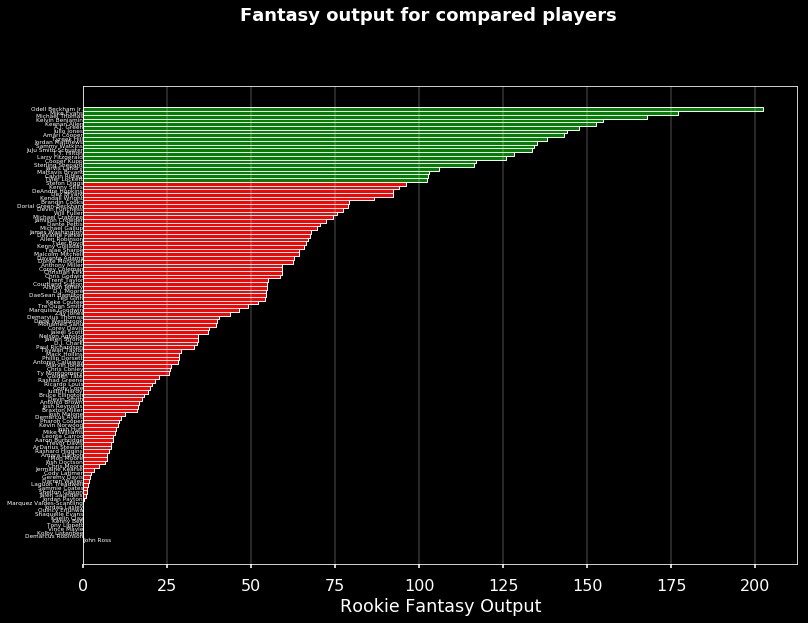

In [33]:
plt.style.use('seaborn-poster')

compareProdWR, ax = plt.subplots()

combinedProd = [[i,j] for i,j in zip(combProdName,combProd)]

sortedProd = sorted(combinedProd, key = itemgetter(1))
print(sortedProd)

sortedProdData = [row[1] for row in sortedProd]

#y_pos = np.arange(len(sortedProdData))

#sortedRSquaredData = [row[0] for row in sortedRSquared]
#for i in sortedRSquaredData:
    #print(i)
y_pos = np.arange(len(sortedProdData))

colorList = []

#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}
fontdict='default'
for i in sortedProdData:
    if i < 100:
        colorList.append('red')
    elif i > 100:
        colorList.append('green')
        
ax.barh(y_pos,sortedProdData,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[0] for row in sortedProd]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 0:
        ax.text(rect.get_x() + .05, height, label, ha='left', va='bottom', fontsize='xx-small',color = 'white')
    elif rect.get_y() >=0:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize='xx-small',color='white')

compareProdWR.suptitle("Fantasy output for compared players", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Fantasy Output")
ax.grid(alpha = .2)
#compareProdWR.savefig('fantasyGraphs/WRProdAll.png', dpi = 400, bbox_inches = 'tight')

[['Tyler Ervin', -2.0], ['Chris Thompson', 0.0], ['Joe Williams', 0.0], ['Jeremy McNichols', 0.0], ['T.J. Logan', 0.0], ['Elijah Hood', 0.0], ['Marcus Murphy', 0.0], ['Lache Seastrunk', 0.0], ['Tyler Gaffney', 0.0], ['Terrance Ganaway', 0.0], ['Edwin Baker', 0.0], ['Ryan Williams', 0.0], ['Mikel Leshoure', 0.0], ['Dan Herron', 1.0], ['Alex Green', 2.0], ['Bilal Powell', 3.0], ['C.J. Anderson', 4.0], ['Daniel Lasco', 4.0], ['Josh Robinson', 5.0], ['Isaiah Pead', 5.0], ['Dri Archer', 6.0], ['James White', 6.0], ['Cyrus Gray', 6.0], ['Brian Hill', 7.0], ['Mike Davis', 10.0], ['Marion Grice', 10.0], ['Shane Vereen', 12.0], ['Mark Walton', 13.7], ['James Conner', 14.0], ['LaMichael James', 15.0], ['Dion Lewis', 16.0], ['David Cobb', 20.0], ['Storm Johnson', 20.0], ['Boston Scott', 20.1], ["Ka'Deem Carey", 22.0], ['Alex Collins', 25.0], ['Chris Rainey', 26.0], ['Cameron Artis-Payne', 30.0], ['Ito Smith', 32.6], ['Kenyan Drake', 35.0], ['Lamar Miller', 36.0], ['Jay Ajayi', 36.0], ['Jordan Wil

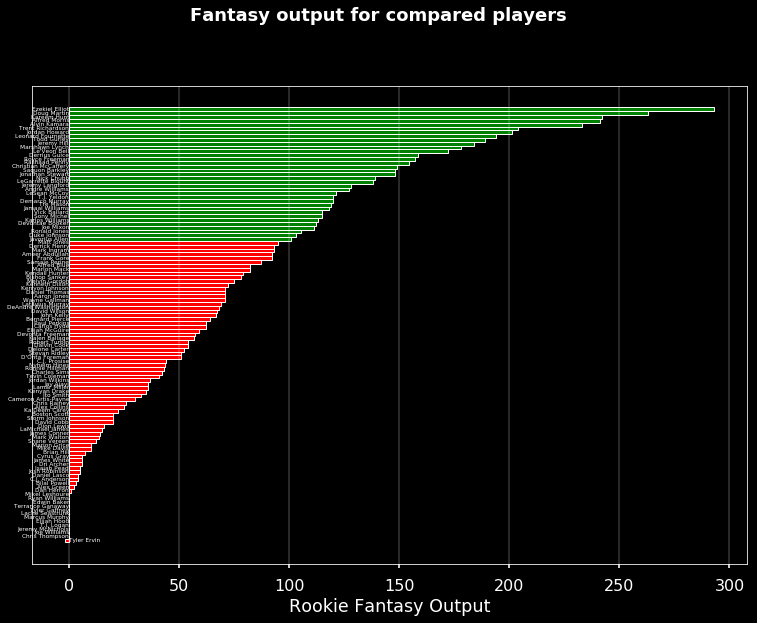

In [34]:
plt.style.use('seaborn-poster')

compareProdRB, ax = plt.subplots()

combinedProdRB = [[i,j] for i,j in zip(combProdRBName,combProdRB)]

sortedProd = sorted(combinedProdRB, key = itemgetter(1))
print(sortedProd)

sortedProdData = [row[1] for row in sortedProd]

y_pos = np.arange(len(sortedProdData))

colorList = []


for i in sortedProdData:
    if i < 100:
        colorList.append('red')
    elif i > 100:
        colorList.append('green')
        
ax.barh(y_pos,sortedProdData,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[0] for row in sortedProd]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 0:
        ax.text(rect.get_x() + .05, height, label, ha='left', va='bottom',fontsize='xx-small', color = 'white')
    elif rect.get_y() >=0:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom', fontsize='xx-small',color='white')

compareProdRB.suptitle("Fantasy output for compared players", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Fantasy Output")
ax.grid(alpha = .2)
#compareProdRB.savefig('fantasyGraphs/RBProdAll.png', dpi = 400, bbox_inches = 'tight')

[[13.7, 'Mark Walton'], [20.1, 'Boston Scott'], [32.6, 'Ito Smith'], [36.5, 'Jordan Wilkins'], [43.4, 'Nyheim Hines'], [56.8, 'Kalen Ballage'], [66.6, 'John Kelly'], [71.0, 'Kerryon Johnson'], [105.4, 'Ronald Jones'], [114.7, 'Sony Michel'], [138.8, 'Nick Chubb'], [148.0, 'Saquon Barkley'], [154.4, 'Rashaad Penny'], [156.9, 'Royce Freeman'], [158.7, 'Derrius Guice']]


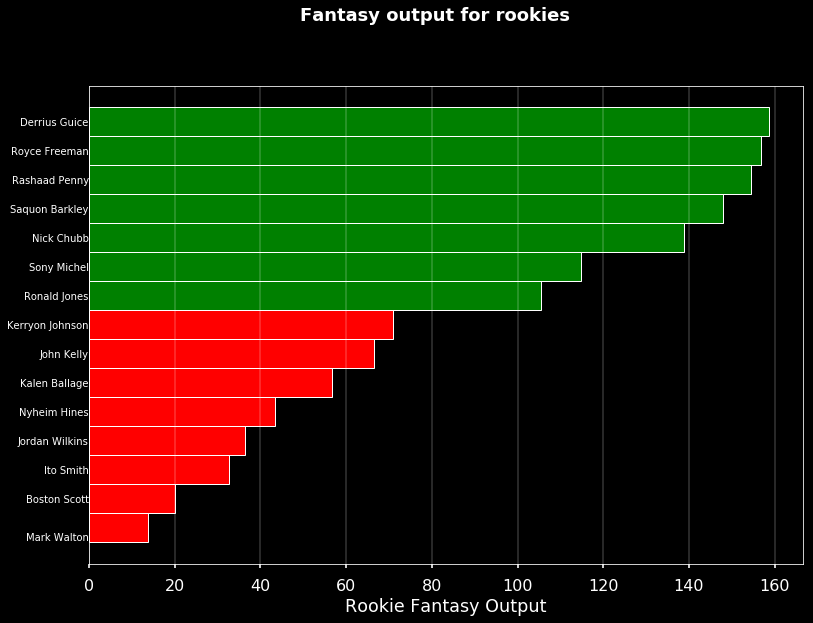

In [35]:
plt.style.use('seaborn-poster')

compareProdRBRook, ax = plt.subplots()

combinedRookRB = [[i,j] for i,j in zip(RookRBProd['FPoints'],RookRBProd['Player'])]

sortedProd = sorted(combinedRookRB, key = itemgetter(0))
print(sortedProd)

sortedProdData = [row[0] for row in sortedProd]

y_pos = np.arange(len(sortedProdData))

colorList = []


for i in sortedProdData:
    if i < np.mean(sortedProdData):
        colorList.append('red')
    elif i > np.mean(sortedProdData):
        colorList.append('green')
        
ax.barh(y_pos,sortedProdData,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[1] for row in sortedProd]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 0:
        ax.text(rect.get_x() + .05, height, label, ha='right', va='bottom',fontsize='medium', color = 'white')
    elif rect.get_y() >=0:
        ax.text(rect.get_x() - .05,height+.3,label,ha='right',va='bottom', fontsize='medium',color='white')

compareProdRBRook.suptitle("Fantasy output for rookies", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Fantasy Output")
ax.grid(alpha = .2)
#compareProdRBRook.savefig('fantasyGraphs/RBProdRook.png', dpi = 400, bbox_inches = 'tight')

In [36]:
#count = 0
#for i in sortedProdData:

    #plt.style.use('seaborn-poster')
    #playerComps, ax = plt.subplots() #creates axis and subplots
    #sortedProdClose = []
    
    #sortedProdClose.append(sortedProdData[count])
    #sortedProdClose.append(sortedProdData[count+1])
    #sortedProdClose.append(sortedProdData[count+2])



    #x_pos = np.arange(len(sortedProdClose))

    #ax.bar(x_pos, sortedProdClose,color = 'green', edgecolor = 'white', linewidth = 1)


    #labels = sortedProd[count],sortedProd[count+1],sortedProd[count+2]

    #rects = ax.patches
    #for rect, label in zip(rects, labels):
        #height = .025
        #ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
                #ha='center', va='bottom', rotation = 'vertical', color = 'black', size = 16)

    #playerComps.suptitle("Nearest neighbor fantasy contributors", weight = 'bold', size = 18, y = 1.005)
    #ax.xaxis.set_visible(False)
    #ax.yaxis.set_visible(False)
    
    #count+=1


#mseGuards.savefig('mse-guards.png', dpi = 400, bbox_inches = 'tight')

[[0.0, 'Jordan Lasley'], [0.0, 'Marquez Valdes-Scantling'], [7.0, "J'Mon Moore"], [28.2, 'Antonio Callaway'], [34.0, 'D.J. Chark'], [37.0, 'Jaleel Scott'], [48.9, "Tre'Quan Smith"], [52.1, 'Keke Coutee'], [54.3, 'DaeSean Hamilton'], [54.5, 'D.J. Moore'], [54.7, 'Courtland Sutton'], [59.1, 'Christian Kirk'], [59.3, 'Anthony Miller'], [67.7, 'James Washington'], [69.7, 'Michael Gallup'], [70.4, 'Dante Pettis'], [102.5, 'Calvin Ridley']]


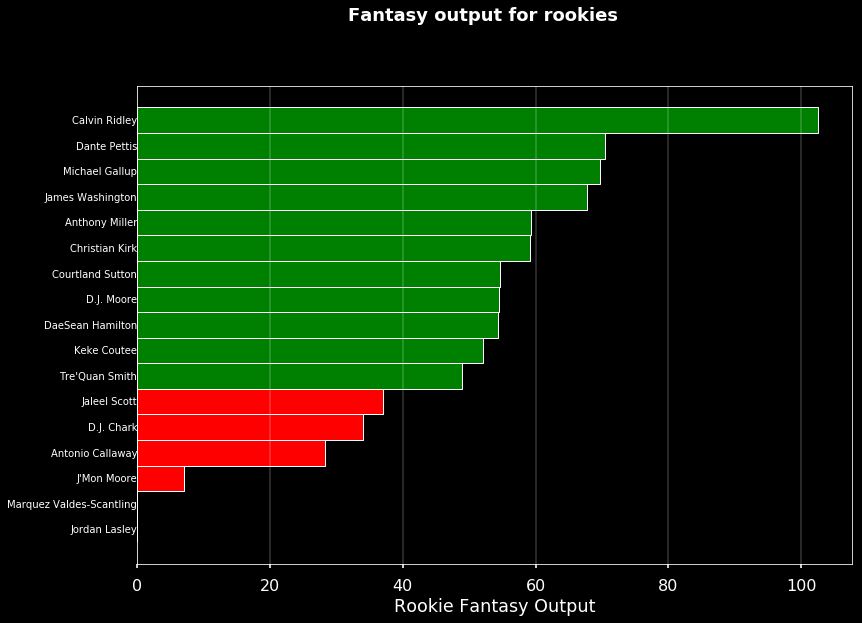

In [37]:
plt.style.use('seaborn-poster')

compareProdWRRook, ax = plt.subplots()

combinedRookWR = [[i,j] for i,j in zip(RookWRProd['FPoints'],RookWRProd['Name'])]

sortedProd = sorted(combinedRookWR, key = itemgetter(0))
print(sortedProd)

sortedProdData = [row[0] for row in sortedProd]

y_pos = np.arange(len(sortedProdData))

colorList = []


for i in sortedProdData:
    if i < np.mean(sortedProdData):
        colorList.append('red')
    elif i > np.mean(sortedProdData):
        colorList.append('green')
        
ax.barh(y_pos,sortedProdData,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[1] for row in sortedProd]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() <= -1:
        ax.text(rect.get_x() + .05, height, label, ha='left', va='bottom',fontsize='medium', color = 'white')
    elif rect.get_y() >-1:
        ax.text(rect.get_x() - .05,height+.3,label,ha='right',va='bottom', fontsize='medium',color='white')

compareProdWRRook.suptitle("Fantasy output for rookies", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Fantasy Output")
ax.grid(alpha = .2)
#compareProdWRRook.savefig('fantasyGraphs/WRProdRook.png', dpi = 400, bbox_inches = 'tight')

College tackles for loss and FY FF: slope = -0.3067323395454175 , intercept = 66.98565718977657 , r_value = -0.3116797768102174 , p_value = 0.0016871422611824348 , std_err = 0.0949454707089651


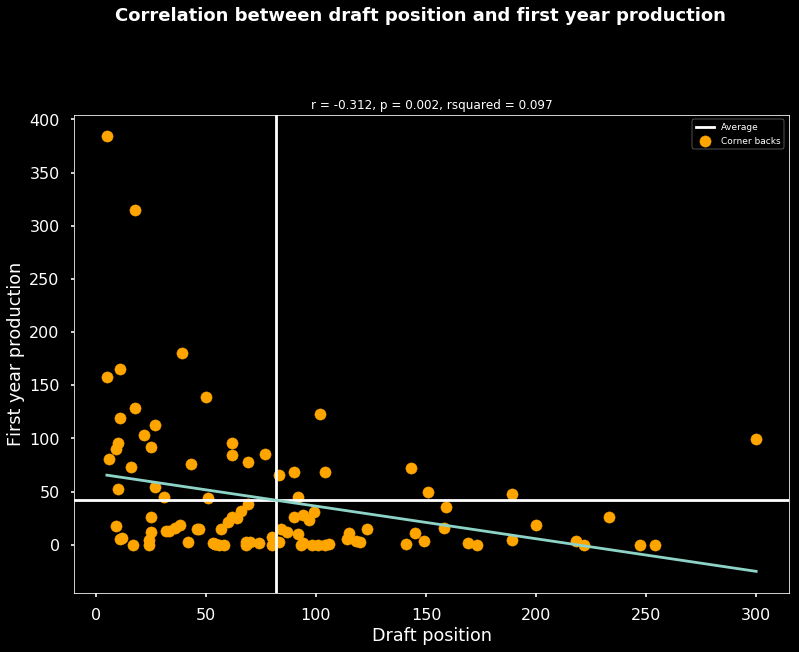

In [38]:
plt.style.use('dark_background')
yardsAllCBs, ax = plt.subplots()

ax.scatter(dfFYCBs['DraftPos'], dfFYCBs['RProdScale'], color = 'orange', label = "Corner backs")
ax.axvline(x = np.mean(dfFYCBs['DraftPos']), color = 'white')
ax.axhline(y = np.mean(dfFYCBs['RProdScale']), label = "Average", color = 'white')
yardsAllCBs.suptitle("Correlation between draft position and first year production", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Draft position")
ax.set_ylabel("First year production")

ax.plot(np.unique(dfFYCBs['DraftPos']), np.poly1d(np.polyfit(dfFYCBs['DraftPos'], dfFYCBs['RProdScale'],1))(np.unique(dfFYCBs['DraftPos'])))

ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})

slope, intercept, r_value, p_value, std_err = linregress(dfFYCBs['DraftPos'], dfFYCBs['RProdScale'])
print("College tackles for loss and FY FF: slope =", slope, ", intercept =", intercept, ", r_value =", r_value, ", p_value =", p_value, ", std_err =", std_err)

rsquared = r_value**2
rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquared, 3))

ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
yardsAllCBs.savefig('fantasyGraphs/CollegetoNFL-correlationTackles2FF.png', dpi = 400, bbox_inches = 'tight')

In [39]:
colArrCB = dfFYCBs.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
fyArrCB = dfFYCBs.iloc[:, [16,17,18,19,20,21,22,23]]
rSquareArrCB = []
colUseCB = []
fyUseCB = []
for i in colArrCB:
    for j in fyArrCB:
        
        #plt.style.use('dark_background')

        #yardsAllRBs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfFYCBs[i], dfFYCBs[j])
        rsquaredArr1CB = r_value**2
        rSquareArrCB.append(rsquaredArr1CB)
        colUseCB.append(i)
        fyUseCB.append(j)

        #ax.scatter(dfFYRBs[i], dfFYRBs[j], color = 'orange', label = "Running backs")
        #ax.axvline(x = np.mean(dfFYRBs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYRBs[j]), label = "Average", color = 'white')
        #yardsAllRBs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYRBs[i]), np.poly1d(np.polyfit(dfFYRBs[i], dfFYRBs[j],1))(np.unique(dfFYRBs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllRBs.savefig('newGraphs/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
for n,m,f in zip(rSquareArrCB,colUseCB,fyUseCB):
    print(n,m,f)


1.2751432907078216e-07 Height Games-FY
0.000560657373096029 Height Tackles-FY
0.0025713540432848844 Height STF-FY
0.0005026631508268471 Height PD-game-FY
0.0007349273256381853 Height Int-FY
0.002111193534513178 Height PD-FY
0.015837800123366514 Height FF-FY
0.0020293972509293438 Height AV-FY
0.020616912135311145 Weight Games-FY
0.0024392477268231467 Weight Tackles-FY
0.001533989072955414 Weight STF-FY
0.0015935554153687086 Weight PD-game-FY
0.00012363600030020517 Weight Int-FY
0.003853292986500995 Weight PD-FY
0.026958485647358837 Weight FF-FY
0.04023893468419648 Weight AV-FY
0.02102867356707516 Seasons-Col Games-FY
6.155774451608436e-05 Seasons-Col Tackles-FY
0.0010606973448624068 Seasons-Col STF-FY
0.003570347634323763 Seasons-Col PD-game-FY
0.014707193148301689 Seasons-Col Int-FY
0.003146277613089725 Seasons-Col PD-FY
2.414332276408169e-05 Seasons-Col FF-FY
0.005494130495306696 Seasons-Col AV-FY
0.025104175738999722 Games-Col Games-FY
0.002695172595149411 Games-Col Tackles-FY
0.0081

[[1.2751432907078216e-07, 'Height', 'Games-FY'], [2.8350864777281618e-06, 'Vertical', 'FF-FY'], [2.414332276408169e-05, 'Seasons-Col', 'FF-FY'], [4.244510225655742e-05, 'Vertical', 'Int-FY'], [4.8646783178378054e-05, 'Games-Col', 'PD-FY'], [6.155774451608436e-05, 'Seasons-Col', 'Tackles-FY'], [9.421137351954121e-05, 'FF-Col', 'PD-FY'], [9.853762805147439e-05, '40 yd dash', 'Int-FY'], [0.00012363600030020517, 'Weight', 'Int-FY'], [0.00014210007707200022, 'Games-Col', 'AV-FY'], [0.000227061867154958, 'Games-Col', 'PD-game-FY'], [0.00034951395748002053, '40 yd dash', 'FF-FY'], [0.0003927444271208542, 'FF-Col', 'Int-FY'], [0.0005026631508268471, 'Height', 'PD-game-FY'], [0.000560657373096029, 'Height', 'Tackles-FY'], [0.0006190171683517158, 'Games-Col', 'Int-FY'], [0.0006885197064006391, '40 yd dash', 'STF-FY'], [0.0007349273256381853, 'Height', 'Int-FY'], [0.0007961568957832116, 'DraftPos', 'FF-FY'], [0.0010606973448624068, 'Seasons-Col', 'STF-FY'], [0.0010851827808169919, 'TFL-Col', 'Gam

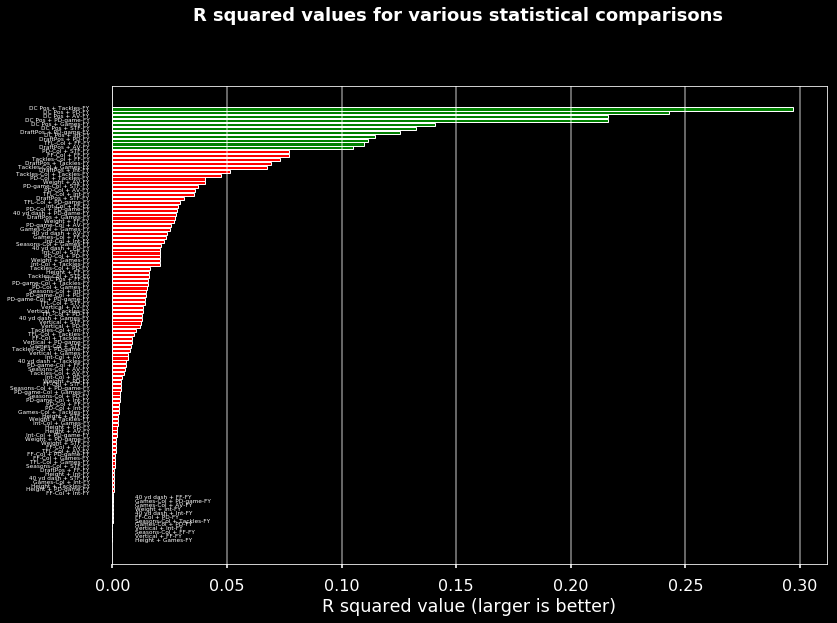

In [40]:
plt.style.use('seaborn-poster')

compareStatsCB, ax = plt.subplots()

statsGraphCB = []
for i in rSquareArrCB:
    statsGraphCB.append(float(i))
combinedStatsCB = [[i,j,k] for i,j,k in zip(statsGraphCB,colUseCB,fyUseCB)]


sortedRSquaredCB = sorted(combinedStatsCB, key = itemgetter(0))
print(sortedRSquaredCB)

sortedRSquaredDataCB = [row[0] for row in sortedRSquaredCB]
y_pos = np.arange(len(sortedRSquaredDataCB))

colorList = []

for i in sortedRSquaredDataCB:
    if i < 0.1:
        colorList.append('red')
    elif i > 0.1:
        colorList.append('green')
        
ax.barh(y_pos,sortedRSquaredDataCB,color = colorList, edgeColor = 'white', linewidth=1)

labels = [row[1]+' + '+row[2] for row in sortedRSquaredCB]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .01, height, label, ha='left', va='bottom', fontsize='xx-small', color = 'white')
    elif rect.get_y() >=11:
        ax.text(rect.get_x() - .01,height,label,ha='right',va='bottom', fontsize='xx-small',color='white')

compareStatsCB.suptitle("R squared values for various statistical comparisons", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("R squared value (larger is better)")
ax.grid(alpha = .5)
#compareStatsCB.savefig('fantasyGraphs/CBRSquared.png', dpi = 400, bbox_inches = 'tight')

In [41]:
train, test = train_test_split(dfFYCBs, test_size = 0.25, random_state = 99)

xtrainCB = train[['Height','Weight','Seasons-Col','Games-Col','Tackles-Col', 'TFL-Col', 'PD-game-Col', 'Int-Col', 'PD-Col','FF-Col', '40 yd dash', 'Vertical', 'DC Pos', 'DraftPos']]
ytrainCB = train[['RProdScale']].astype(int)

xtestCB = test[['Height','Weight','Seasons-Col','Games-Col','Tackles-Col', 'TFL-Col', 'PD-game-Col', 'Int-Col', 'PD-Col', '40 yd dash', 'Vertical', 'DC Pos', 'DraftPos','FF-Col']]
ytestCB = test[['RProdScale']].astype(int)

In [42]:
linRegCB = linear_model.LinearRegression(fit_intercept = False)
linRegCB.fit(xtrainCB,ytrainCB)

y_predLinCB = linRegCB.predict(xtestCB)
linR2CB = abs(1/r2_score(ytestCB,y_predLinCB))

print("Mean squared error: %.3f"%mean_squared_error(ytestCB, y_predLinCB))
print("Variance score: %.3f"%r2_score(ytestCB,y_predLinCB))

cvScoreLin = cross_val_score(linRegCB,xtestCB,ytestCB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLin.mean(), cvScoreLin.std()*2))

Mean squared error: 4804814.494
Variance score: -2354.257
Accuracy (cross validation score): -11.94 (+/- 35.16)


In [43]:
ridgeRegCB = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeRegCB.fit(xtrainCB,ytrainCB)

y_predRidgeCB = ridgeRegCB.predict(xtestCB)
ridgeR2CB = abs(1/r2_score(ytestCB,y_predRidgeCB))

print("Mean squared error: %.3f"%mean_squared_error(ytestCB, y_predRidgeCB))
print("Variance score: %.3f"%r2_score(ytestCB,y_predRidgeCB))

cvScoreRidge = cross_val_score(ridgeRegCB,xtestCB,ytestCB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidge.mean(), cvScoreRidge.std()*2))

Mean squared error: 3750638.103
Variance score: -1837.513
Accuracy (cross validation score): -4.12 (+/- 13.06)


In [44]:
lassoRegCB = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoRegCB.fit(xtrainCB,ytrainCB)

y_predLassoCB = lassoRegCB.predict(xtestCB)
lassoR2CB = abs(1/r2_score(ytestCB,y_predLassoCB))

print("Mean squared error: %.3f"%mean_squared_error(ytestCB, y_predLassoCB))
print("Variance score: %.3f"%r2_score(ytestCB,y_predLassoCB))

cvScoreLasso = cross_val_score(lassoRegCB,xtestCB,ytestCB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLasso.mean(), cvScoreLasso.std()*2))

Mean squared error: 2021652.130
Variance score: -989.987
Accuracy (cross validation score): -2.14 (+/- 7.66)


In [45]:
logRegCB = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logRegCB.fit(xtrainCB,ytrainCB)

y_predLogCB = logRegCB.predict(xtestCB)

print("Mean squared error: %.3f"%mean_squared_error(ytestCB, y_predLogCB))
print("Variance score: %.3f"%r2_score(ytestCB,y_predLogCB))

Mean squared error: 2838.080
Variance score: -0.391


C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
linear_cbs = linRegCB.predict(rookCBTest)
for i,j in zip(linear_cbs, rookCBNames):
    print(i,j)

[73.09755378] Denzel Ward
[63.05567362] Jaire Alexander
[60.74453697] Josh Jackson
[40.89694816] Mike Hughes
[76.65819305] M.J. Stewart
[53.66098024] Carlton Davis
[32.0697276] Donte Jackson
[69.99735205] Duke Dawson
[33.57159149] Isaiah Oliver
[18.63576385] Rashaan Gaulden
[-1.69306873] Isaac Yiadom
[45.78663837] Nick Nelson
[-15.96826604] Anthony Averett
[41.10714922] Taron Johnson
[22.33884489] Avonte Maddox
[16.53636452] D.J. Reed
[35.17067318] Dane Cruikshank
[20.45384274] Darius Phillips
[37.39887343] Parry Nickerson
[-45.60960283] Greg Stroman
[81.2929288] Minkah Fitzpatrick


In [47]:
ridge_cbs = ridgeRegCB.predict(rookCBTest)
for i,j in zip(ridge_cbs, rookCBNames):
    print(i,j)

[70.5638405] Denzel Ward
[59.39278033] Jaire Alexander
[56.26286303] Josh Jackson
[40.36894494] Mike Hughes
[71.41099753] M.J. Stewart
[51.26950088] Carlton Davis
[27.52012557] Donte Jackson
[67.35498486] Duke Dawson
[29.78081201] Isaiah Oliver
[15.85412164] Rashaan Gaulden
[-3.31336017] Isaac Yiadom
[45.46507274] Nick Nelson
[-16.10658059] Anthony Averett
[33.6520852] Taron Johnson
[21.73300829] Avonte Maddox
[22.46191952] D.J. Reed
[34.95845522] Dane Cruikshank
[18.96811893] Darius Phillips
[29.70184061] Parry Nickerson
[-49.22296956] Greg Stroman
[82.85408822] Minkah Fitzpatrick


In [48]:
lasso_cbs = lassoRegCB.predict(rookCBTest)
for i,j in zip(lasso_cbs, rookCBNames):
    print(i,j)

64.45722337688518 Denzel Ward
60.20183729850394 Jaire Alexander
56.32416642258137 Josh Jackson
49.56735034261726 Mike Hughes
71.87547423215287 M.J. Stewart
63.1816147193294 Carlton Davis
40.15542257158948 Donte Jackson
53.70368906474481 Duke Dawson
44.19130823163548 Isaiah Oliver
29.533233759543386 Rashaan Gaulden
17.379423416360783 Isaac Yiadom
47.02341503250981 Nick Nelson
8.194998515852056 Anthony Averett
44.37401075033125 Taron Johnson
24.1875945829253 Avonte Maddox
29.854472646553813 D.J. Reed
27.23672667452794 Dane Cruikshank
22.93518287310004 Darius Phillips
29.452260405422592 Parry Nickerson
-30.734160222529248 Greg Stroman
84.68146910032604 Minkah Fitzpatrick


In [49]:
log_cbs = logRegCB.predict(rookCBTest)
for i,j in zip(log_cbs, rookCBNames):
    print(i,j)

52 Denzel Ward
31 Jaire Alexander
16 Josh Jackson
31 Mike Hughes
112 M.J. Stewart
1 Carlton Davis
5 Donte Jackson
15 Duke Dawson
31 Isaiah Oliver
15 Rashaan Gaulden
1 Isaac Yiadom
95 Nick Nelson
1 Anthony Averett
49 Taron Johnson
45 Avonte Maddox
0 D.J. Reed
0 Dane Cruikshank
49 Darius Phillips
49 Parry Nickerson
27 Greg Stroman
18 Minkah Fitzpatrick


In [50]:
averageProdCB = []
for i,j,h in zip(linear_cbs,ridge_cbs,lasso_cbs):
    averageProdCB.append(float((i*linR2CB+j*ridgeR2CB+h*lassoR2CB)/(linR2CB+ridgeR2CB+lassoR2CB)))

combinedAvgCB = [[i,j] for i,j in zip(rookCBNames, averageProdCB)]

sortedAvgCB = sorted(combinedAvgCB, key = itemgetter(1))
print(sortedAvgCB)

[['Greg Stroman', -39.01088937412695], ['Anthony Averett', -3.673536297030173], ['Isaac Yiadom', 7.595849240513939], ['Darius Phillips', 21.311754696877184], ['Avonte Maddox', 23.11583997878858], ['Rashaan Gaulden', 23.43285652801825], ['D.J. Reed', 24.963254678502935], ['Dane Cruikshank', 31.062885487617958], ['Parry Nickerson', 31.226433268222987], ['Donte Jackson', 34.9455530220961], ['Isaiah Oliver', 37.94942652057197], ['Taron Johnson', 40.72452620439311], ['Mike Hughes', 45.17707043101915], ['Nick Nelson', 46.32945597373012], ['Josh Jackson', 57.2560317154269], ['Carlton Davis', 57.86263326724099], ['Jaire Alexander', 60.591866381972956], ['Duke Dawson', 60.954575961563584], ['Denzel Ward', 67.99086374317048], ['M.J. Stewart', 72.77424326020754], ['Minkah Fitzpatrick', 83.45170678508441]]


[['Terrance Mitchell', 0.0], ['Dre Kirkpatrick', 0.0], ['William Jackson', 0.0], ['Ross Cockrell', 0.0], ['Senquez Golson', 0.0], ['Brian Allen', 0.0], ['Jalen Myrick', 0.0], ['Will Redmond', 0.0], ['Stanley Jean-Baptiste', 0.0], ['Dexter McDougle', 0.0], ['Jaylen Watkins', 0.0], ['Will Davis', 0.0], ['Marc Anthony', 0.0], ['Greg Stroman', 0.0], ['Steven Nelson', 0.2], ['Jamar Taylor', 0.6], ['Mackensie Alexander', 0.6], ['Eric Murray', 0.6], ['Zack Sanchez', 0.8], ['Fabian Moreau', 1.2], ['Cameron Sutton', 1.2], ['KeiVarae Russell', 1.2], ['Treston Decoud', 1.6], ['Teez Tabor', 2.0], ['Jalen Collins', 2.2], ['Craig Mager', 2.4], ['Blidi Wreh-Wilson', 2.8], ['Josh Shaw', 3.0], ['Leon McFadden', 3.0], ['Damontae Kazee', 3.2], ['Juston Burris', 3.8], ['Kevon Seymour', 3.9], ['Darqueze Dennard', 4.2], ['Charles Gaines', 4.7], ['Trae Waynes', 5.6], ['Aaron Colvin', 5.7], ['Nick Nelson', 6.3], ['D.J. Hayden', 6.8], ['Jamell Fleming', 7.6], ['Taron Johnson', 9.1], ['Brandon Williams', 10.4],

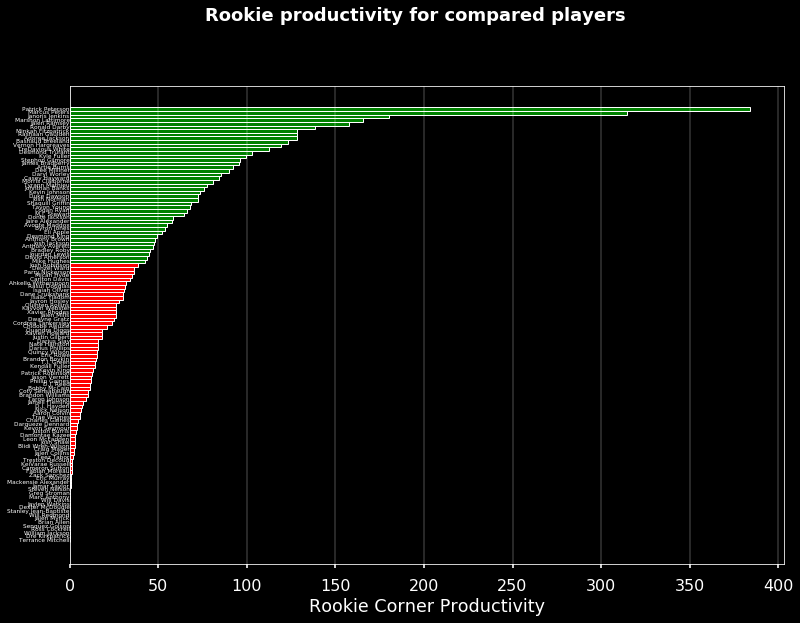

In [51]:
plt.style.use('seaborn-poster')

compareProdCB, ax = plt.subplots()

combinedProdCB = [[i,j] for i,j in zip(combProdCBName,combProdCB)]

sortedProdCB = sorted(combinedProdCB, key = itemgetter(1))
print(sortedProdCB)

sortedProdDataCB = [row[1] for row in sortedProdCB]


y_pos = np.arange(len(sortedProdDataCB))

colorList = []

fontdict='default'
for i in sortedProdDataCB:
    if i < np.mean(sortedProdDataCB):
        colorList.append('red')
    elif i > np.mean(sortedProdDataCB):
        colorList.append('green')
        
ax.barh(y_pos,sortedProdDataCB,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[0] for row in sortedProdCB]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 0:
        ax.text(rect.get_x() + .05, height, label, ha='right', va='bottom', fontsize='xx-small',color = 'white')
    elif rect.get_y() >=0:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize='xx-small',color='white')

compareProdCB.suptitle("Rookie productivity for compared players", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Corner Productivity")
ax.grid(alpha = .2)
#compareProdCB.savefig('fantasyGraphs/CBProdAll.png', dpi = 400, bbox_inches = 'tight')

[[0.0, 'Greg Stroman'], [6.3, 'Nick Nelson'], [9.1, 'Taron Johnson'], [11.4, 'D.J. Reed'], [15.8, 'Darius Phillips'], [30.3, 'Isaac Yiadom'], [30.3, 'Dane Cruikshank'], [30.9, 'Isaiah Oliver'], [33.9, 'Carlton Davis'], [36.3, 'Parry Nickerson'], [36.6, 'Denzel Ward'], [42.8, 'Mike Hughes'], [46.8, 'Anthony Averett'], [47.6, 'Josh Jackson'], [55.2, 'Avonte Maddox'], [58.0, 'Jaire Alexander'], [58.4, 'Donte Jackson'], [64.8, 'M.J. Stewart'], [72.5, 'Duke Dawson'], [128.4, 'Rashaan Gaulden'], [128.4, 'Minkah Fitzpatrick']]


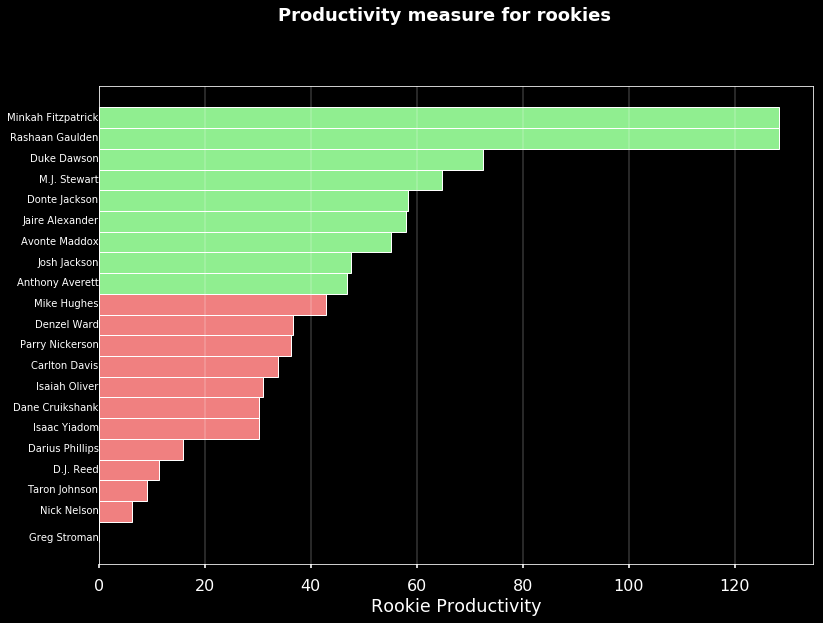

In [52]:
plt.style.use('seaborn-poster')

compareProdCBRook, ax = plt.subplots()

combinedRookCB = [[i,j] for i,j in zip(RookCBProd['RProdScale'],RookCBProd['Player'])]

sortedProd = sorted(combinedRookCB, key = itemgetter(0))
print(sortedProd)

sortedProdData = [row[0] for row in sortedProd]

y_pos = np.arange(len(sortedProdData))

colorList = []


for i in sortedProdData:
    if i < np.mean(RookCBProd['RProdScale']):
        colorList.append('lightcoral')
    elif i > np.mean(RookCBProd['RProdScale']):
        colorList.append('lightgreen')
        
ax.barh(y_pos,sortedProdData,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[1] for row in sortedProd]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 0:
        ax.text(rect.get_x() + .05, height, label, ha='right', va='bottom',fontsize='medium', color = 'white')
    elif rect.get_y() >=0:
        ax.text(rect.get_x() - .05,height+.3,label,ha='right',va='bottom', fontsize='medium',color='white')

compareProdCBRook.suptitle("Productivity measure for rookies", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Productivity")
ax.grid(alpha = .2)

Draft position and FY yards: slope = 0.28014373738029064 , intercept = -34.53415166099083 , r_value = 0.476691576968269 , p_value = 6.832179908706588e-05 , std_err = 0.0656101992669032


Text(0.5,1,'r = 0.477, p = 0.0, rsquared = 0.227')

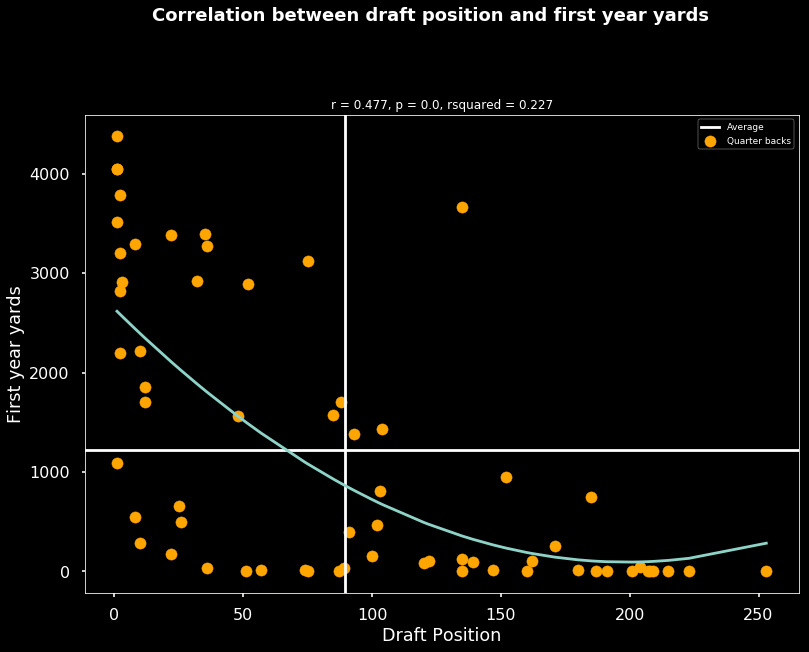

In [53]:
plt.style.use('dark_background')
yardsAllQBs, ax = plt.subplots()

ax.scatter(dfFYQBs['DraftPos'], dfFYQBs['Yards-FY'], color = 'orange', label = "Quarter backs")
ax.axvline(x = np.mean(dfFYQBs['DraftPos']), color = 'white')
ax.axhline(y = np.mean(dfFYQBs['Yards-FY']), label = "Average", color = 'white')
yardsAllQBs.suptitle("Correlation between draft position and first year yards", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Draft Position")
ax.set_ylabel("First year yards")

ax.plot(np.unique(dfFYQBs['DraftPos']), np.poly1d(np.polyfit(dfFYQBs['DraftPos'], dfFYQBs['Yards-FY'],2))(np.unique(dfFYQBs['DraftPos'])))

ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})

slope, intercept, r_value, p_value, std_err = linregress(dfFYQBs['PR-Col'], dfFYQBs['TDs-FY'])
print("Draft position and FY yards: slope =", slope, ", intercept =", intercept, ", r_value =", r_value, ", p_value =", p_value, ", std_err =", std_err)

rsquared = r_value**2
rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquared, 3))

ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
#yardsAllQBs.savefig('fantasyGraphs/CollegetoNFL-correlationDraft2Carry.png', dpi = 400, bbox_inches = 'tight')

In [54]:
colArrQB = dfFYQBs.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
fyArrQB = dfFYQBs.iloc[:, [19,20,21,22,23,24,25,26,27,28,29,30]]
rSquareArrQB = []
colUseQB = []
fyUseQB = []
for i in colArrQB:
    for j in fyArrQB:
        
        #plt.style.use('dark_background')

        #yardsAllRBs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfFYQBs[i], dfFYQBs[j])
        rsquaredArr1QB = r_value**2
        rSquareArrQB.append(rsquaredArr1QB)
        colUseQB.append(i)
        fyUseQB.append(j)

        #ax.scatter(dfFYRBs[i], dfFYRBs[j], color = 'orange', label = "Running backs")
        #ax.axvline(x = np.mean(dfFYRBs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYRBs[j]), label = "Average", color = 'white')
        #yardsAllRBs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYRBs[i]), np.poly1d(np.polyfit(dfFYRBs[i], dfFYRBs[j],1))(np.unique(dfFYRBs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllRBs.savefig('newGraphs/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
for n,m,f in zip(rSquareArrQB,colUseQB,fyUseQB):
    print(n,m,f)

0.01702509541580396 Height Yards-FY
0.045852404434223865 Height TDs-FY
0.03776995894013782 Height AYA-FY
0.010783384046800428 Height PR-FY
0.004460909161071237 Height Int-FY
0.0688829612363747 Height CPercent-FY
0.026297515370779866 Height RAtt-FY
0.037631927946242975 Height RYards-FY
0.0029681397738951696 Height RTD-FY
0.029112030586325516 Height FPoints-FY
0.04517208937158558 Height AV-FY
0.02048282507356962 Height Games-FY
7.787450115338577e-06 Weight Yards-FY
0.0035196001345142156 Weight TDs-FY
0.0011798892227847981 Weight AYA-FY
0.000784736530809676 Weight PR-FY
0.001187733343339122 Weight Int-FY
0.09124678577645062 Weight CPercent-FY
4.2273907033153684e-05 Weight RAtt-FY
0.00046127408225474584 Weight RYards-FY
0.029159446253441787 Weight RTD-FY
4.2274649409538727e-05 Weight FPoints-FY
0.000223484172782167 Weight AV-FY
0.00014002423685238337 Weight Games-FY
0.029798657204382076 Seasons-Col Yards-FY
0.018749410325836137 Seasons-Col TDs-FY
0.009591240871962475 Seasons-Col AYA-FY
0.0

[[2.1518691575465827e-06, 'TDs-Col', 'RTD-FY'], [7.787450115338577e-06, 'Weight', 'Yards-FY'], [9.020656680325484e-06, 'Games-Col', 'FPoints-FY'], [2.740359864956122e-05, 'RTD-Col', 'CPercent-FY'], [4.2273907033153684e-05, 'Weight', 'RAtt-FY'], [4.2274649409538727e-05, 'Weight', 'FPoints-FY'], [8.11362744170111e-05, 'Games-Col', 'Games-FY'], [0.00014002423685238337, 'Weight', 'Games-FY'], [0.00016471774899669712, 'Games-Col', 'RYards-FY'], [0.000223484172782167, 'Weight', 'AV-FY'], [0.0002323195063199236, 'Games-Col', 'AV-FY'], [0.0002825841904813505, 'Games-Col', 'RAtt-FY'], [0.0002901899770746921, 'Games-Col', 'Yards-FY'], [0.0002962784758915845, 'Yards-Col', 'AV-FY'], [0.00046127408225474584, 'Weight', 'RYards-FY'], [0.000625062608755732, 'Yards-Col', 'RYards-FY'], [0.0007318515971991545, 'Yards-Col', 'Int-FY'], [0.000784736530809676, 'Weight', 'PR-FY'], [0.0007973301124719567, 'RAtt-Col', 'CPercent-FY'], [0.0008076314763207114, 'Int-Col', 'CPercent-FY'], [0.0009607080193144213, 'RY

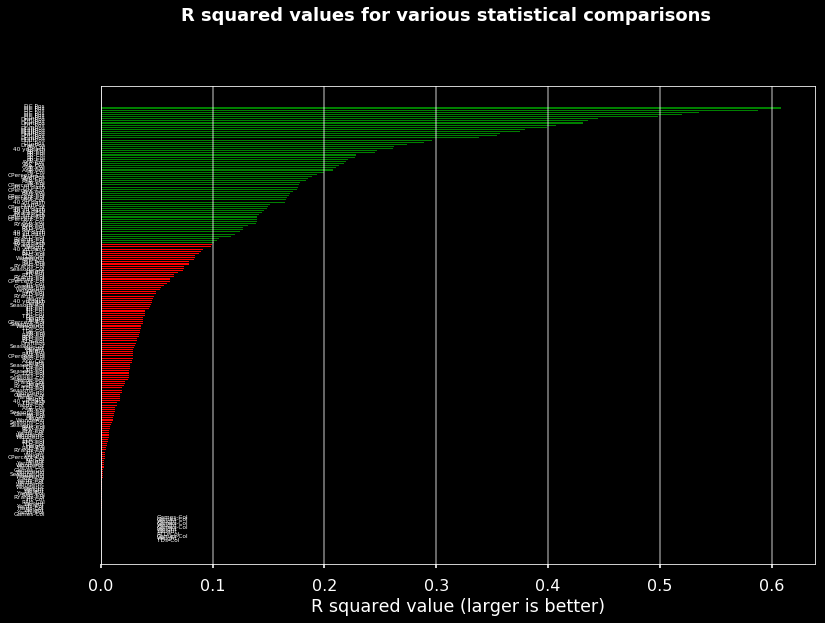

In [55]:
plt.style.use('seaborn-poster')

compareStatsQB, ax = plt.subplots()

statsGraphQB = []
for i in rSquareArrQB:
    statsGraphQB.append(float(i))
combinedStatsQB = [[i,j,k] for i,j,k in zip(statsGraphQB,colUseQB,fyUseQB)]


sortedRSquaredQB = sorted(combinedStatsQB, key = itemgetter(0))
print(sortedRSquaredQB)

sortedRSquaredDataQB = [row[0] for row in sortedRSquaredQB]
y_pos = np.arange(len(sortedRSquaredDataQB))

colorList = []

for i in sortedRSquaredDataQB:
    if i < 0.1:
        colorList.append('red')
    elif i > 0.1:
        colorList.append('green')
        
ax.barh(y_pos,sortedRSquaredDataQB,height=0.5,color = colorList, edgeColor = 'white', linewidth=0)

labels = [row[1] for row in sortedRSquaredQB]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .05, height, label, ha='left', va='bottom', fontsize='xx-small', color = 'white')
    elif rect.get_y() >=11:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom', fontsize='xx-small', color='white')

compareStatsQB.suptitle("R squared values for various statistical comparisons", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("R squared value (larger is better)")
ax.grid(alpha = .5)
#compareStatsQB.savefig('fantasyGraphs/QBRSquared.png', dpi = 400, bbox_inches = 'tight')

In [56]:
train, test = train_test_split(dfFYQBs, test_size = 0.25, random_state = 42)

xtrainQB = train[['Height','Weight','Seasons-Col','Games-Col','Yards-Col', 'TDs-Col', 'AYA-Col', 'PR-Col', 'Int-Col', 'CPercent-Col', 'RAtt-Col', 'RYards-Col', 'RTD-Col', 'Wonderlic', '40 yd dash', 'DC Pos', 'DraftPos']]
ytrainQB = train[['FPoints-FY']].astype(int)

xtestQB = test[['Height','Weight','Seasons-Col','Games-Col','Yards-Col', 'TDs-Col', 'AYA-Col', 'PR-Col', 'Int-Col', 'CPercent-Col', 'RAtt-Col', 'RYards-Col', 'RTD-Col', 'Wonderlic', '40 yd dash', 'DC Pos', 'DraftPos']]
ytestQB = test[['FPoints-FY']].astype(int)

In [57]:
linRegQB = linear_model.LinearRegression(fit_intercept = False)
linRegQB.fit(xtrainQB,ytrainQB)

y_predLinQB = linRegQB.predict(xtestQB)
linR2QB = abs(1/(r2_score(ytestQB,y_predLinQB)))

print("Mean squared error: %.3f"%mean_squared_error(ytestQB, y_predLinQB))
print("Variance score: %.3f"%r2_score(ytestQB,y_predLinQB))

cvScoreLin = cross_val_score(linRegQB,xtestQB,ytestQB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLin.mean(), cvScoreLin.std()*2))

Mean squared error: 4949.541
Variance score: 0.389
Accuracy (cross validation score): -7.64 (+/- 14.64)


In [58]:
ridgeRegQB = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeRegQB.fit(xtrainQB,ytrainQB)

y_predRidgeQB = ridgeRegQB.predict(xtestQB)
ridgeR2QB = abs(1/(r2_score(ytestQB,y_predRidgeQB)))

print("Mean squared error: %.3f"%mean_squared_error(ytestQB, y_predRidgeQB))
print("Variance score: %.3f"%r2_score(ytestQB,y_predRidgeQB))

cvScoreRidge = cross_val_score(ridgeRegQB,xtestQB,ytestQB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidge.mean(), cvScoreRidge.std()*2))

Mean squared error: 5197.226
Variance score: 0.359
Accuracy (cross validation score): -6.14 (+/- 13.25)


In [59]:
lassoRegQB = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoRegQB.fit(xtrainQB,ytrainQB)

y_predLassoQB = lassoRegQB.predict(xtestQB)
lassoR2QB = abs(1/(r2_score(ytestQB,y_predLassoQB)))

print("Mean squared error: %.3f"%mean_squared_error(ytestQB, y_predLassoQB))
print("Variance score: %.3f"%r2_score(ytestQB,y_predLassoQB))

cvScoreLasso = cross_val_score(lassoRegQB,xtestQB,ytestQB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLasso.mean(), cvScoreLasso.std()*2))

Mean squared error: 5100.900
Variance score: 0.371
Accuracy (cross validation score): 0.30 (+/- 1.38)


In [60]:
logRegQB = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logRegQB.fit(xtrainQB,ytrainQB)

y_predLogQB = logRegQB.predict(xtestQB)

print("Mean squared error: %.3f"%mean_squared_error(ytestQB, y_predLogQB))
print("Variance score: %.3f"%r2_score(ytestQB,y_predLogQB))

Mean squared error: 9632.500
Variance score: -0.189


C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
linear_qbs = linRegQB.predict(rookQBTest)
for i,j in zip(linear_qbs, rookQBNames):
    print(i,j)

[207.5701232] Baker Mayfield
[-33.9298486] Sam Darnold
[108.86540242] Josh Allen
[40.71305003] Josh Rosen
[41.80307367] Lamar Jackson
[87.87659145] Mason Rudolph
[-591.66072226] Kyle Lauletta
[14.98797115] Mike White
[-37.13516525] Luke Falk
[-110.52741641] Tanner Lee
[-107.8683671] Danny Etling


In [62]:
ridge_qbs = ridgeRegQB.predict(rookQBTest)
for i,j in zip(ridge_qbs, rookQBNames):
    print(i,j)

[223.6497622] Baker Mayfield
[116.80318531] Sam Darnold
[109.72477612] Josh Allen
[61.60688793] Josh Rosen
[66.44217369] Lamar Jackson
[72.1840855] Mason Rudolph
[-36.1224631] Kyle Lauletta
[6.63877316] Mike White
[-18.29969051] Luke Falk
[-94.26149938] Tanner Lee
[-66.7305987] Danny Etling


In [63]:
lasso_qbs = lassoRegQB.predict(rookQBTest)
for i,j in zip(lasso_qbs, rookQBNames):
    print(i,j)

228.72110697199057 Baker Mayfield
132.6274698472391 Sam Darnold
118.5039937323313 Josh Allen
69.70804007120374 Josh Rosen
79.67732054822422 Lamar Jackson
79.90896391401634 Mason Rudolph
-11.266127057557306 Kyle Lauletta
14.434746312867276 Mike White
-23.115122839109134 Luke Falk
-93.28817589560725 Tanner Lee
-41.99775824815437 Danny Etling


In [64]:
log_qbs = logRegQB.predict(rookQBTest)
for i,j in zip(log_qbs, rookQBNames):
    print(i,j)

90 Baker Mayfield
173 Sam Darnold
176 Josh Allen
174 Josh Rosen
293 Lamar Jackson
0 Mason Rudolph
0 Kyle Lauletta
0 Mike White
-2 Luke Falk
50 Tanner Lee
0 Danny Etling


In [65]:
averageProdQB = []
for i,j,h in zip(linear_qbs,ridge_qbs,lasso_qbs):
    averageProdQB.append(float((i*linR2QB+j*ridgeR2QB+h*lassoR2QB)/(linR2QB+ridgeR2QB+lassoR2QB)))

combinedAvg = [[i,j] for i,j in zip(rookQBNames, averageProdQB)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

[['Kyle Lauletta', -204.96450261481579], ['Tanner Lee', -99.12286636368873], ['Danny Etling', -71.56470776379804], ['Luke Falk', -25.91970655977417], ['Mike White', 11.913028120892156], ['Josh Rosen', 57.65737399517211], ['Lamar Jackson', 63.01808784724491], ['Sam Darnold', 74.0333703306567], ['Mason Rudolph', 79.77640495841223], ['Josh Allen', 112.39167078583976], ['Baker Mayfield', 220.22060286304537]]


[['Brett Hundley', -2], ['Ryan Mallett', -2], ['Brock Osweiler', -1], ['Davis Webb', 0], ['Joshua Dobbs', 0], ['Brad Kaaya', 0], ['Chad Kelly', 0], ['Christian Hackenberg', 0], ['Nate Sudfield', 0], ['Jake Rudock', 0], ['Brandon Allen', 0], ['Jeff Driskel', 0], ['Brandon Doughty', 0], ['Garrett Grayson', 0], ['Tom Savage', 0], ['Nathan Enderle', 0], ['Greg McElroy', 0], ['Mike Kafka', 0], ['Levi Brown', 0], ['Kyle Lauletta', 0], ['Luke Falk', 0], ['Tanner Lee', 0], ['Danny Etling', 0], ['Sean Mannion', 1], ['Colin Kaepernick', 1], ['Tyrod Taylor', 1], ['Cardale Jones', 2], ['Tony Pike', 2], ['Logan Thomas', 7], ['Connor Cook', 8], ['Patrick Mahomes', 10], ['Nathan Peterman', 10], ['Johnny Manziel', 12], ['Mike White', 12], ['Ryan Lindley', 13], ['Kevin Hogan', 17], ['Paxton Lynch', 28], ['Jacoby Brissett', 28], ['Bryce Petty', 32], ['Kirk Cousins', 33], ['Jake Locker', 49], ['T.J. Yates', 50], ['Jared Goff', 53], ['Josh Rosen', 58], ['Jimmy Clausen', 62], ['Lamar Jackson', 63], ['Sam D

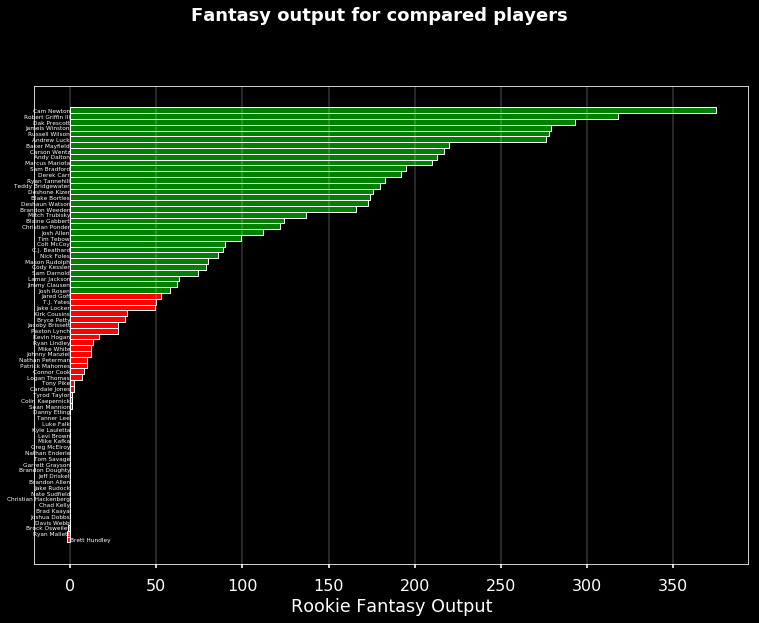

In [66]:
plt.style.use('seaborn-poster')

compareProdQB, ax = plt.subplots()

combinedProdQB = [[i,j] for i,j in zip(combProdQBName,combProdQB)]

sortedProdQB = sorted(combinedProdQB, key = itemgetter(1))
print(sortedProdQB)

sortedProdDataQB = [row[1] for row in sortedProdQB]

y_pos = np.arange(len(sortedProdDataQB))

colorList = []

#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}
fontdict='default'
for i in sortedProdDataQB:
    if i < np.mean(RookQBProd['FPoints']):
        colorList.append('red')
    elif i > np.mean(RookQBProd['FPoints']):
        colorList.append('green')
        
ax.barh(y_pos,sortedProdDataQB,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[0] for row in sortedProdQB]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 0:
        ax.text(rect.get_x() + .05, height, label, ha='left', va='bottom', fontsize='xx-small',color = 'white')
    elif rect.get_y() >=0:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize='xx-small',color='white')

compareProdQB.suptitle("Fantasy output for compared players", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Fantasy Output")
ax.grid(alpha = .2)
#compareProdQB.savefig('fantasyGraphs/QBProdAll.png', dpi = 400, bbox_inches = 'tight')

[[0, 'Kyle Lauletta'], [0, 'Luke Falk'], [0, 'Tanner Lee'], [0, 'Danny Etling'], [12, 'Mike White'], [58, 'Josh Rosen'], [63, 'Lamar Jackson'], [74, 'Sam Darnold'], [80, 'Mason Rudolph'], [112, 'Josh Allen'], [220, 'Baker Mayfield']]


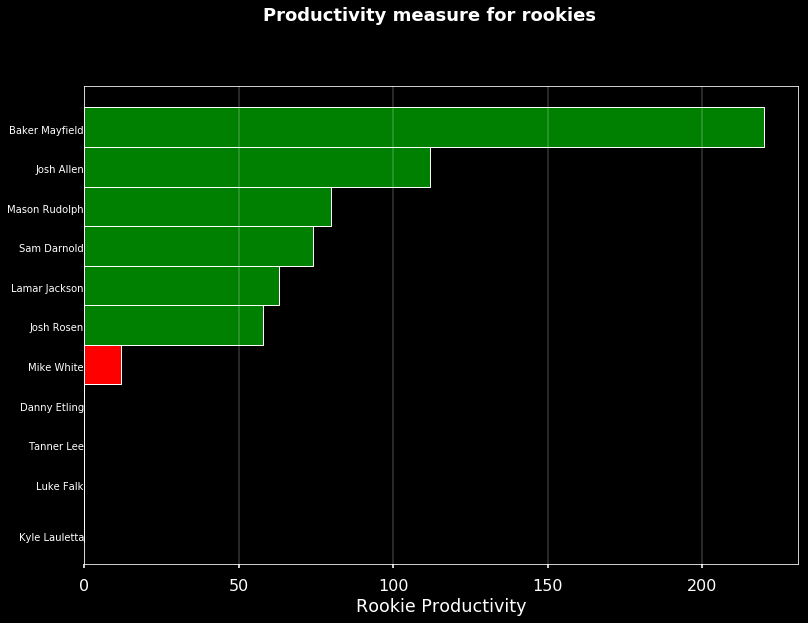

In [67]:
plt.style.use('seaborn-poster')

compareProdQBRook, ax = plt.subplots()

combinedRookQB = [[i,j] for i,j in zip(RookQBProd['FPoints'],RookQBProd['Player'])]

sortedProdQB = sorted(combinedRookQB, key = itemgetter(0))
print(sortedProdQB)

sortedProdDataQB = [row[0] for row in sortedProdQB]

y_pos = np.arange(len(sortedProdDataQB))

colorList = []


for i in sortedProdDataQB:
    if i < np.mean(RookQBProd['FPoints']):
        colorList.append('red')
    elif i > np.mean(RookQBProd['FPoints']):
        colorList.append('green')
        
ax.barh(y_pos,sortedProdDataQB,height = 1, color = colorList, edgeColor = 'white', linewidth=1,tick_label='yes')


labels = [row[1] for row in sortedProdQB]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 0:
        ax.text(rect.get_x() + .05, height, label, ha='right', va='bottom',fontsize='medium', color = 'white')
    elif rect.get_y() >=0:
        ax.text(rect.get_x() - .05,height+.3,label,ha='right',va='bottom', fontsize='medium',color='white')

compareProdQBRook.suptitle("Productivity measure for rookies", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("Rookie Productivity")
ax.grid(alpha = .2)
#compareProdQBRook.savefig('fantasyGraphs/QBProdRook.png', dpi = 400, bbox_inches = 'tight')

In [68]:
fRangeRBs = pd.read_csv('final-csv-data/NFL-Rookies-RBs-Preds.csv')
fRangeWRs = pd.read_csv('final-csv-data/NFL-Rookies-WR-Preds.csv')
fRangeQBs = pd.read_csv('final-csv-data/NFL-Rookies-QBs-Preds.csv')

rookFRangeQBs = fRangeQBs.iloc[:, [0,19,28,29]]

prodRangeQBHigh = [rookFRangeQBs['FPointsHigh']]
prodRangeQBLow = [rookFRangeQBs['FPointsLow']]
prodRangeQBMid = [rookFRangeQBs['FPoints']]
prodRangeQBNames = [rookFRangeQBs['Player']]
combRangeQBHigh = pd.concat(prodRangeQBHigh)
combRangeQBLow = pd.concat(prodRangeQBLow)
combRangeQBName = pd.concat(prodRangeQBNames)
#for i,j,k in zip (combRangeQBName,combRangeQBHigh,combRangeQBLow):
    #print(i,j,k)
    

rookFRangeWRs = fRangeWRs.iloc[:, [0,15,23,24]]
prodRangeWRHigh = [rookFRangeWRs['FPointsHigh']]
prodRangeWRLow = [rookFRangeWRs['FPointsLow']]
prodRangeWRMid = [rookFRangeWRs['FPoints']]
prodRangeWRNames = [rookFRangeWRs['Name']]
combRangeWRHigh = pd.concat(prodRangeWRHigh)
combRangeWRLow = pd.concat(prodRangeWRLow)
combRangeWRName = pd.concat(prodRangeWRNames)
#for i,j,k in zip (combRangeWRName,combRangeWRHigh,combRangeWRLow):
    #print(i,j,k)
    
rookFRangeRBs = fRangeRBs.iloc[:, [0,18,26,27]]
prodRangeRBHigh = [rookFRangeRBs['FPointsHigh']]
prodRangeRBLow = [rookFRangeRBs['FPointsLow']]
prodRangeRBMid = [rookFRangeRBs['FPoints']]
prodRangeRBNames = [rookFRangeRBs['Player']]
combRangeRBHigh = pd.concat(prodRangeRBHigh)
combRangeRBLow = pd.concat(prodRangeRBLow)
combRangeRBName = pd.concat(prodRangeRBNames)
#for i,j,k in zip (combRangeRBName,combRangeRBHigh,combRangeRBLow):
    #print(i,j,k)

Text(0.5,1.005,'Range of fantasy outcomes for rookie quarterbacks')

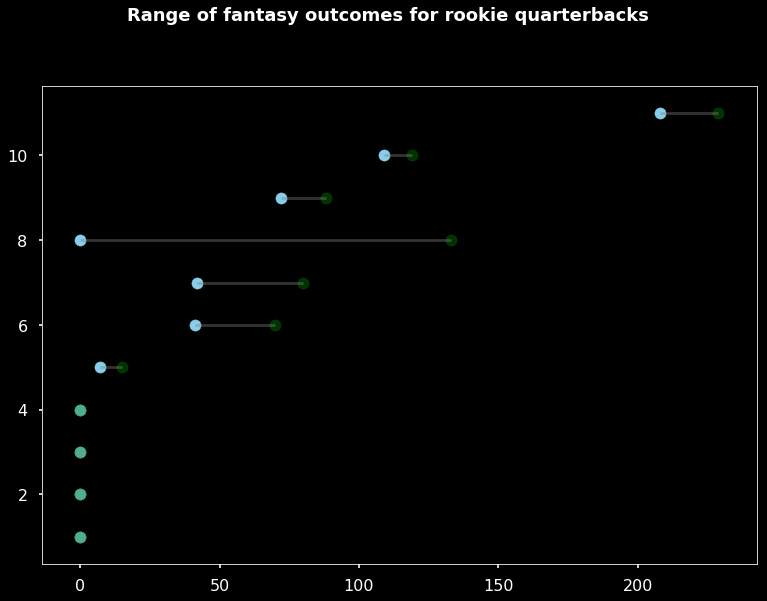

In [69]:
plt.style.use('seaborn-poster')
df = pd.DataFrame({'name':prodRangeQBNames[0], 'MinProd':prodRangeQBLow[0] , 'MaxProd':prodRangeQBHigh[0], 'MidProd':prodRangeQBMid[0] })
fRangeQBGraph, ax = plt.subplots()
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='MidProd')
my_range=range(1,len(df.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature

ax.hlines(y=my_range, xmin=ordered_df['MinProd'], xmax=ordered_df['MaxProd'], color='grey', alpha=0.4)
ax.scatter(ordered_df['MinProd'], my_range, color='skyblue', alpha=1)
ax.scatter(ordered_df['MaxProd'], my_range, color='green', alpha=0.4)

fRangeQBGraph.suptitle("Range of fantasy outcomes for rookie quarterbacks", weight = 'bold', size = 18, y = 1.005)

#fRangeQBGraph.savefig('fantasyGraphs/QBRange.png', dpi = 400, bbox_inches = 'tight')

Text(0.5,1.005,'Range of fantasy outcomes for rookie wide receivers')

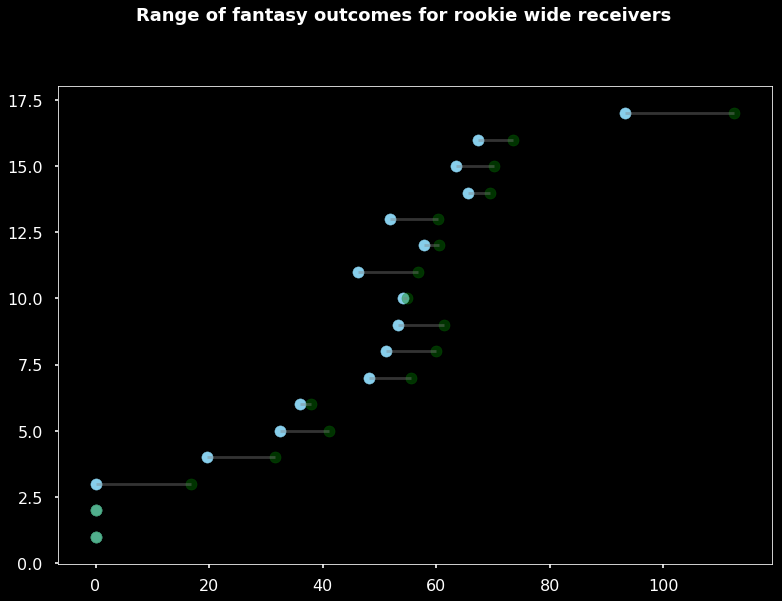

In [70]:
plt.style.use('seaborn-poster')
dfWR = pd.DataFrame({'name':prodRangeWRNames[0], 'MinProd':prodRangeWRLow[0] , 'MaxProd':prodRangeWRHigh[0], 'MidProd':prodRangeWRMid[0] })
fRangeWRGraph, ax = plt.subplots()

 
# Reorder it following the values of the first value:
ordered_dfWR = dfWR.sort_values(by='MidProd')
my_range=range(1,len(dfWR.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature

ax.hlines(y=my_range, xmin=ordered_dfWR['MinProd'], xmax=ordered_dfWR['MaxProd'], color='grey', alpha=0.4)
ax.scatter(ordered_dfWR['MinProd'], my_range, color='skyblue', alpha=1)
ax.scatter(ordered_dfWR['MaxProd'], my_range, color='green', alpha=0.4)

fRangeWRGraph.suptitle("Range of fantasy outcomes for rookie wide receivers", weight = 'bold', size = 18, y = 1.005)

#fRangeWRGraph.savefig('fantasyGraphs/WRRange.png', dpi = 400, bbox_inches = 'tight')

Text(0.5,1.005,'Range of fantasy outcomes for rookie running backs')

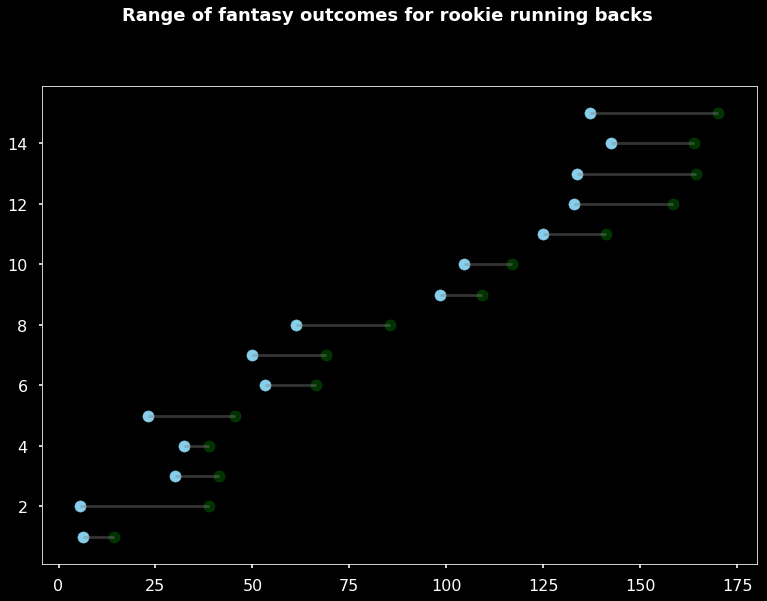

In [71]:
plt.style.use('seaborn-poster')
dfRB = pd.DataFrame({'name':prodRangeRBNames[0], 'MinProd':prodRangeRBLow[0] , 'MaxProd':prodRangeRBHigh[0], 'MidProd':prodRangeRBMid[0] })
fRangeRBGraph, ax = plt.subplots()

 
# Reorder it following the values of the first value:
ordered_dfRB = dfRB.sort_values(by='MidProd')
my_range=range(1,len(dfRB.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature

ax.hlines(y=my_range, xmin=ordered_dfRB['MinProd'], xmax=ordered_dfRB['MaxProd'], color='grey', alpha=0.4)
ax.scatter(ordered_dfRB['MinProd'], my_range, color='skyblue', alpha=1)
ax.scatter(ordered_dfRB['MaxProd'], my_range, color='green', alpha=0.4)

fRangeRBGraph.suptitle("Range of fantasy outcomes for rookie running backs", weight = 'bold', size = 18, y = 1.005)

#fRangeRBGraph.savefig('fantasyGraphs/RBRange.png', dpi = 400, bbox_inches = 'tight')

Draft Position and FY Yards: slope = 40.49609127235034 , intercept = 279.7761808081522 , r_value = 0.2178333680422235 , p_value = 0.08378193180996403 , std_err = 23.042862718238887


Text(0.5,1,'r = 0.218, p = 0.084, rsquared = 0.047')

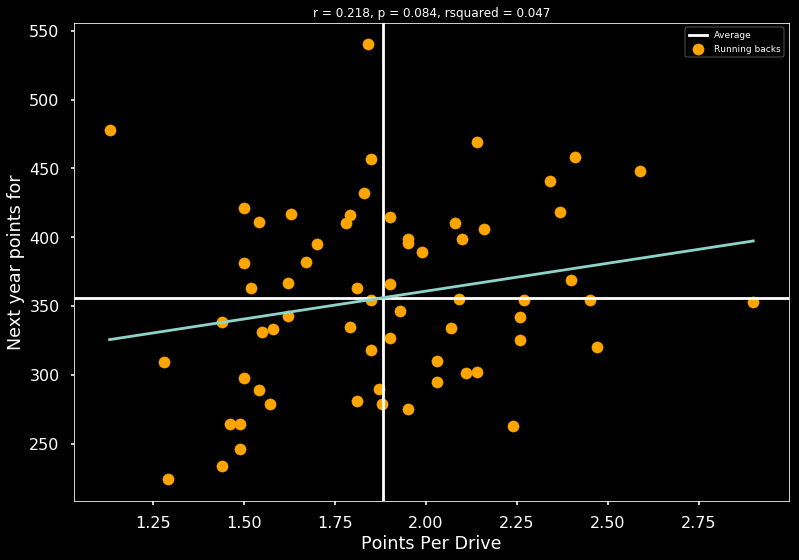

In [72]:
plt.style.use('dark_background')
teamCorr, ax = plt.subplots()

ax.scatter(dfOldTeams['PPD'], dfOldTeams['NYPF'], color = 'orange', label = "Running backs")
ax.axvline(x = np.mean(dfOldTeams['PPD']), color = 'white')
ax.axhline(y = np.mean(dfOldTeams['NYPF']), label = "Average", color = 'white')
yardsAllRBs.suptitle("Correlation between draft position and first year fantasy points", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Points Per Drive")
ax.set_ylabel("Next year points for")

ax.plot(np.unique(dfOldTeams['PPD']), np.poly1d(np.polyfit(dfOldTeams['PPD'], dfOldTeams['NYPF'],1))(np.unique(dfOldTeams['PPD'])))

ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})

slope, intercept, r_value, p_value, std_err = linregress(dfOldTeams['PPD'], dfOldTeams['NYPF'])
print("Draft Position and FY Yards: slope =", slope, ", intercept =", intercept, ", r_value =", r_value, ", p_value =", p_value, ", std_err =", std_err)

rsquared = r_value**2
rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquared, 3))

ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
#yardsAllRBs.savefig('fantasyGraphs/CollegetoNFL-correlationDepth2Points.png', dpi = 400, bbox_inches = 'tight')

In [73]:
oldArr = dfOldTeams.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
theseArr = dfOldTeams.iloc[:, [30,31,32,33,34,35]]
rSquareArr = []
oldUse = []
theseUse = []
for i in oldArr:
    for j in theseArr:
        
        #plt.style.use('dark_background')

        #yardsAllRBs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfOldTeams[i], dfOldTeams[j])
        rsquaredArr1 = r_value**2
        rSquareArr.append(rsquaredArr1)
        oldUse.append(i)
        theseUse.append(j)

        #ax.scatter(dfFYRBs[i], dfFYRBs[j], color = 'orange', label = "Running backs")
        #ax.axvline(x = np.mean(dfFYRBs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYRBs[j]), label = "Average", color = 'white')
        #yardsAllRBs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYRBs[i]), np.poly1d(np.polyfit(dfFYRBs[i], dfFYRBs[j],1))(np.unique(dfFYRBs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllRBs.savefig('newGraphs/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
for n,m,f in zip(rSquareArr,oldUse,theseUse):
    print(n,m,f)


0.06714674831449699 Wins NYWins
0.027088044935763212 Wins NYDVOA
0.03754268595341697 Wins NYPA
0.021841858710246687 Wins NYPF
0.03231276966172999 Wins NYoDVOA
0.00030850915764836197 Wins NYdDVOA
0.06714674831449699 Losses NYWins
0.027088044935763212 Losses NYDVOA
0.03754268595341697 Losses NYPA
0.021841858710246687 Losses NYPF
0.03231276966172999 Losses NYoDVOA
0.00030850915764836197 Losses NYdDVOA
0.13798168975751296 PythWins NYWins
0.0703952251530183 PythWins NYDVOA
0.13794885622461428 PythWins NYPA
0.028112450197973447 PythWins NYPF
0.036064561996725 PythWins NYoDVOA
0.025993958048576817 PythWins NYdDVOA
0.0533792478445199 PointsAllowed NYWins
0.018246993878551533 PointsAllowed NYDVOA
0.08984465068282069 PointsAllowed NYPA
0.007163996077102028 PointsAllowed NYPF
0.0004707446695221234 PointsAllowed NYoDVOA
0.030474377728208837 PointsAllowed NYdDVOA
0.12336948799680705 PointsFor NYWins
0.07797238280073429 PointsFor NYDVOA
0.07510725100491417 PointsFor NYPA
0.0390401113874492 PointsFor

[[4.2905260554852204e-07, 'ImpAdd', 'NYDVOA'], [4.306431045137473e-06, 'dEXP', 'NYPF'], [4.469023693668372e-06, 'DVOA', 'NYDVOA'], [5.086044451435384e-05, 'PPD', 'NYdDVOA'], [6.017288026398439e-05, 'rEXP', 'NYoDVOA'], [9.302754768925077e-05, 'PPDa', 'NYPF'], [0.0001328951084566089, 'AVg', 'NYPF'], [0.00013989069619731127, 'dpEXP', 'NYPF'], [0.00015111605847068892, 'Takeaways', 'NYoDVOA'], [0.00016738397910960967, 'rEXP', 'NYDVOA'], [0.00027808351751690627, 'dRZ%', 'NYWins'], [0.00030850915764836197, 'Wins', 'NYdDVOA'], [0.00030850915764836197, 'Losses', 'NYdDVOA'], [0.0004707446695221234, 'PointsAllowed', 'NYoDVOA'], [0.0005498380902012539, 'SOS', 'NYPA'], [0.0006812959926375488, 'AVl', 'NYPA'], [0.0007963162071000263, 'dSc%', 'NYoDVOA'], [0.0008089279962580909, 'oDVOA', 'NYPF'], [0.001086617540657826, 'VAR', 'NYWins'], [0.0011365337164867398, 'SOS', 'NYdDVOA'], [0.0012714432078137345, 'drEXP', 'NYPF'], [0.0014451499741556593, 'VAR', 'NYPA'], [0.00164631188684645, 'TO%', 'NYPF'], [0.00

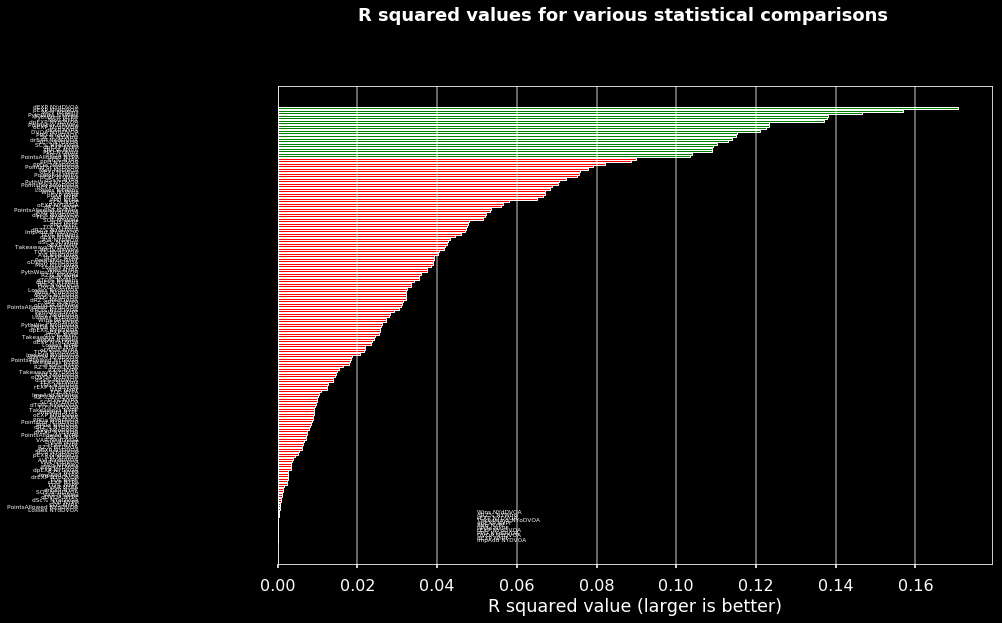

In [74]:
plt.style.use('seaborn-poster')

compareStatsTeams, ax = plt.subplots()

statsGraph = []
for i in rSquareArr:
    statsGraph.append(float(i))
combinedStats = [[i,j,k] for i,j,k in zip(statsGraph,oldUse,theseUse)]


sortedRSquared = sorted(combinedStats, key = itemgetter(0))
print(sortedRSquared)

sortedRSquaredData = [row[0] for row in sortedRSquared]
y_pos = np.arange(len(sortedRSquaredData))

colorList = []

for i in sortedRSquaredData:
    if i < 0.1:
        colorList.append('red')
    elif i > 0.1:
        colorList.append('green')
        
ax.barh(y_pos,sortedRSquaredData,color = colorList, edgeColor = 'white', linewidth=1)

labels = [row[1]+' '+row[2] for row in sortedRSquared]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .05, height, label, ha='left', fontsize = 'xx-small', va='bottom', color = 'white')
    elif rect.get_y() >=11:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize = 'xx-small',color='white')

compareStatsTeams.suptitle("R squared values for various statistical comparisons", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("R squared value (larger is better)")
ax.grid(alpha = .5)
#compareStatsTeams.savefig('fantasyGraphs/RBRSquared.png', dpi = 400, bbox_inches = 'tight')

In [75]:
train, test = train_test_split(dfOldTeams, test_size = 0.25, random_state = 42)

xtrainTeam = train[['Wins','Losses','PythWins','PointsAllowed','PointsFor', 'MoV', 'SOS', 'VAR', 'oDVOA', 'DVOA', 'TOL', 'SC%', 'TO%', 'oEXP', 'pEXP', 'rEXP', 'RZ%', 'PPD', 'dEXP', 'Takeaways', 'dSc%', 'dTO%', 'dpEXP', 'drEXP', 'dRZ%', 'PPDa', 'AVg', 'AVl', 'ImpAdd']]
ytrainTeam = train[['NYDVOA']].astype(int)

xtestTeam = test[['Wins','Losses','PythWins','PointsAllowed','PointsFor', 'MoV', 'SOS', 'VAR', 'oDVOA', 'DVOA', 'TOL', 'SC%', 'TO%', 'oEXP', 'pEXP', 'rEXP', 'RZ%', 'PPD', 'dEXP', 'Takeaways', 'dSc%', 'dTO%', 'dpEXP', 'drEXP', 'dRZ%', 'PPDa', 'AVg', 'AVl', 'ImpAdd']]
ytestTeam = test[['NYDVOA']].astype(int)

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(xtrainRB,ytrainRB)
#knn.score(xtestRB,ytestRB)
#print(knn.kneighbors(xtrain, return_distance=False))

In [76]:
linRegTeam = linear_model.LinearRegression(fit_intercept = False)
linRegTeam.fit(xtrainTeam,ytrainTeam)

y_predLinTeam = linRegTeam.predict(xtestTeam)
linR2Team = abs(1/r2_score(ytestTeam,y_predLinTeam))
print("Mean squared error: %.3f"%mean_squared_error(ytestTeam, y_predLinTeam))
print("Variance score: %.3f"%r2_score(ytestTeam,y_predLinTeam))

cvScoreLinTeam = cross_val_score(linRegTeam,xtestTeam,ytestTeam,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLinTeam.mean(), cvScoreLinTeam.std()*2))
print(linR2Team)

Mean squared error: 855.265
Variance score: -3.363
Accuracy (cross validation score): -2.20 (+/- 5.50)
0.2973547487508426


In [77]:
ridgeRegTeam = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeRegTeam.fit(xtrainTeam,ytrainTeam)

y_predRidgeTeam = ridgeRegTeam.predict(xtestTeam)
ridgeR2Team = abs(1/r2_score(ytestTeam,y_predRidgeTeam))
print("Mean squared error: %.3f"%mean_squared_error(ytestTeam, y_predRidgeTeam))
print("Variance score: %.3f"%r2_score(ytestTeam,y_predRidgeTeam))

cvScoreRidgeTeam = cross_val_score(ridgeRegTeam,xtestTeam,ytestTeam,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidgeTeam.mean(), cvScoreRidgeTeam.std()*2))
print(ridgeR2Team)

Mean squared error: 536.682
Variance score: -1.738
Accuracy (cross validation score): -2.13 (+/- 5.42)
0.5754421980455205


In [78]:
lassoRegTeam = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoRegTeam.fit(xtrainTeam,ytrainTeam)

y_predLassoTeam = lassoRegTeam.predict(xtestTeam)
lassoR2Team = abs(1/r2_score(ytestTeam,y_predLassoTeam))

print("Mean squared error: %.3f"%mean_squared_error(ytestTeam, y_predLassoTeam))
print("Variance score: %.3f"%r2_score(ytestTeam,y_predLassoTeam))

cvScoreLasso = cross_val_score(lassoRegTeam,xtestTeam,ytestTeam,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLasso.mean(), cvScoreLasso.std()*2))

Mean squared error: 227.723
Variance score: -0.162
Accuracy (cross validation score): -2.22 (+/- 5.76)


In [79]:
logRegTeam = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logRegTeam.fit(xtrainTeam,ytrainTeam)

y_predLogTeam = logRegTeam.predict(xtestTeam)

print("Mean squared error: %.3f"%mean_squared_error(ytestTeam, y_predLogTeam))
print("Variance score: %.3f"%r2_score(ytestTeam,y_predLogTeam))

Mean squared error: 347.500
Variance score: -0.773


C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
linear_tms = linRegTeam.predict(theseTeamsTest)
for i,j in zip(linear_tms, theseTeamsNames):
    print(i,j)

[16.82975704] Cardinals
[-22.3560483] Falcons
[34.37032783] Ravens
[2.19166723] Bills
[26.37329113] Panthers
[30.25228799] Bears
[-21.22005153] Bengals
[33.69067904] Browns
[-10.68465623] Cowboys
[4.4898516] Broncos
[11.05912689] Lions
[34.08785154] Packers
[13.17320063] Texans
[12.87930755] Colts
[-18.61409132] Jaguars
[0.83642305] Chiefs
[0.58131405] Chargers
[20.09723783] Rams
[2.67234033] Dolphins
[25.42554166] Vikings
[-39.81907092] Patriots
[5.16657804] Saints
[7.40018137] Giants
[-10.663303] Jets
[-10.92681889] Raiders
[-15.44701117] Eagles
[-12.84718693] Steelers
[18.5035838] 49ers
[4.31076094] Seahawks
[3.94986309] Buccaneers
[-9.78703711] Titans
[-0.62545895] Redskins


In [81]:
ridge_tms = ridgeRegTeam.predict(theseTeamsTest)
for i,j in zip(ridge_tms, theseTeamsNames):
    print(i,j)

[10.4896176] Cardinals
[-17.45458924] Falcons
[30.10153255] Ravens
[3.87637037] Bills
[6.21057037] Panthers
[20.80801423] Bears
[-22.66836787] Bengals
[16.96054853] Browns
[-14.13389635] Cowboys
[-3.16854264] Broncos
[12.99900888] Lions
[14.64452933] Packers
[5.44200634] Texans
[5.43420674] Colts
[3.82441842] Jaguars
[2.09041505] Chiefs
[-2.10268189] Chargers
[21.14437173] Rams
[-2.35788841] Dolphins
[15.61207254] Vikings
[-19.1193388] Patriots
[5.66972768] Saints
[4.13835385] Giants
[-4.32522713] Jets
[-16.04137297] Raiders
[8.69264259] Eagles
[-7.02770923] Steelers
[18.64940662] 49ers
[2.76211409] Seahawks
[3.06496202] Buccaneers
[-2.91519595] Titans
[-1.75936306] Redskins


In [82]:
lasso_tms = lassoRegTeam.predict(theseTeamsTest)
for i,j in zip(lasso_tms, theseTeamsNames):
    print(i,j)

0.13244854472640633 Cardinals
0.7247237712459871 Falcons
6.116928762224832 Ravens
-5.083736435719499 Bills
2.392092730330323 Panthers
-1.797756556261632 Bears
-9.081371401702198 Bengals
-1.1858017444263194 Browns
-3.591203143984881 Cowboys
-5.141905361769103 Broncos
-3.065922322587843 Lions
-1.6557730043266954 Packers
3.7366439595892285 Texans
-4.254684776074033 Colts
4.7787072672507485 Jaguars
-3.2322353468354414 Chiefs
5.48667955492689 Chargers
14.482236483448036 Rams
-11.438364025979105 Dolphins
5.221985796627967 Vikings
0.4874104139691724 Patriots
6.535113843315467 Saints
-7.541185601234616 Giants
-2.615339639564145 Jets
-6.2561736885903585 Raiders
15.01014544069564 Eagles
1.5888457475263866 Steelers
1.8508598339289755 49ers
-5.617574180032431 Seahawks
-3.588160191808484 Buccaneers
-5.379011614516278 Titans
-3.4923113374607997 Redskins


In [83]:
log_tms = logRegTeam.predict(theseTeamsTest)
for i,j in zip(log_tms, theseTeamsNames):
    print(i,j)

-20 Cardinals
-1 Falcons
13 Ravens
-19 Bills
-20 Panthers
-28 Bears
-8 Bengals
13 Browns
-1 Cowboys
3 Broncos
1 Lions
-1 Packers
13 Texans
-8 Colts
13 Jaguars
1 Chiefs
-21 Chargers
1 Rams
-8 Dolphins
3 Vikings
1 Patriots
1 Saints
-8 Giants
27 Jets
-1 Raiders
27 Eagles
0 Steelers
-8 49ers
3 Seahawks
-1 Buccaneers
-1 Titans
-21 Redskins


In [84]:
averageProdTeams = []
for i,j,h in zip(linear_tms,ridge_tms,lasso_tms):
    averageProdTeams.append(float((i*linR2Team+j*ridgeR2Team+h*lassoR2Team)/(linR2Team+ridgeR2Team+lassoR2Team)))

combinedAvgTeam = [[i,j] for i,j in zip(theseTeamsNames, averageProdTeams)]

sortedAvgTeams = sorted(combinedAvgTeam, key = itemgetter(1))
print(sortedAvgTeams)

[['Bengals', -10.700639655567777], ['Dolphins', -10.103452065757663], ['Raiders', -7.2508078787481125], ['Giants', -5.959358098372726], ['Titans', -5.363845363703346], ['Cowboys', -4.749680535441357], ['Broncos', -4.575190378198627], ['Seahawks', -4.516017410550003], ['Bills', -4.046630657157929], ['Redskins', -3.230224574389764], ['Jets', -3.0938419192228204], ['Patriots', -2.8094785541240364], ['Colts', -2.7427848040505074], ['Buccaneers', -2.728091716838519], ['Chiefs', -2.626822985426456], ['Falcons', -1.7300067994387454], ['Lions', -1.1609215138791982], ['Steelers', 0.2780529508877327], ['Packers', 1.1792746740086482], ['Bears', 1.3957920506876116], ['Cardinals', 1.6804383783541976], ['Browns', 1.7632298911975157], ['Panthers', 3.7138361344513395], ['Jaguars', 3.715289369019607], ['49ers', 3.9221752570171597], ['Texans', 4.273282895831834], ['Chargers', 4.661195689959711], ['Saints', 6.406893198633548], ['Vikings', 6.920388362272755], ['Ravens', 9.262937772464644], ['Eagles', 13.2

True Shooting and NYELO: slope = 2.187302241498148 , intercept = -193.8920893576199 , r_value = 0.6641239128493207 , p_value = 1.7818842080543815e-08 , std_err = 0.3320172961587231


Text(0.5,1,'r = 0.664, p = 0.0, rsquared = 0.441')

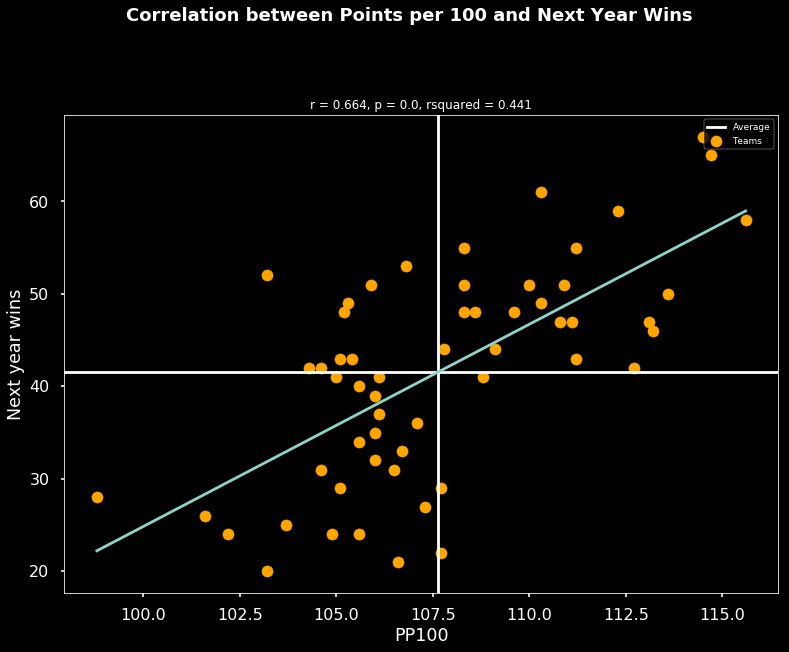

In [85]:
plt.style.use('dark_background')
teamCorrNBA, ax = plt.subplots()

ax.scatter(dfOldNBATeams['PP100'], dfOldNBATeams['NYWins'], color = 'orange', label = "Teams")
ax.axvline(x = np.mean(dfOldNBATeams['PP100']), color = 'white')
ax.axhline(y = np.mean(dfOldNBATeams['NYWins']), label = "Average", color = 'white')
teamCorrNBA.suptitle("Correlation between Points per 100 and Next Year Wins", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("PP100")
ax.set_ylabel("Next year wins")

ax.plot(np.unique(dfOldNBATeams['PP100']), np.poly1d(np.polyfit(dfOldNBATeams['PP100'], dfOldNBATeams['NYWins'],1))(np.unique(dfOldNBATeams['PP100'])))

ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})

slope, intercept, r_value, p_value, std_err = linregress(dfOldNBATeams['PP100'], dfOldNBATeams['NYWins'])
print("True Shooting and NYELO: slope =", slope, ", intercept =", intercept, ", r_value =", r_value, ", p_value =", p_value, ", std_err =", std_err)

rsquared = r_value**2
rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquared, 3))

ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
#yardsAllRBs.savefig('fantasyGraphs/CollegetoNFL-correlationDepth2Points.png', dpi = 400, bbox_inches = 'tight')

In [99]:
oldNBAArr = dfOldNBATeams.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
theseNBAArr = dfOldNBATeams.iloc[:, [32,33,34,35,36,37,38,39,40]]
rSquareArr = []
oldNBAUse = []
theseNBAUse = []
for i in oldNBAArr:
    for j in theseNBAArr:
        
        #plt.style.use('dark_background')

        #yardsAllRBs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfOldNBATeams[i], dfOldNBATeams[j])
        rsquaredArr1 = r_value**2
        rSquareArr.append(rsquaredArr1)
        oldNBAUse.append(i)
        theseNBAUse.append(j)

        #ax.scatter(dfFYRBs[i], dfFYRBs[j], color = 'orange', label = "Running backs")
        #ax.axvline(x = np.mean(dfFYRBs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYRBs[j]), label = "Average", color = 'white')
        #yardsAllRBs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYRBs[i]), np.poly1d(np.polyfit(dfFYRBs[i], dfFYRBs[j],1))(np.unique(dfFYRBs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllRBs.savefig('newGraphs/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
for n,m,f in zip(rSquareArr,oldNBAUse,theseNBAUse):
    print(n,m,f)


0.5410387561802502 Wins NYWins
0.5384855615967805 Wins NYNetRate
0.49339747269462125 Wins NYPIE
0.4965629376542777 Wins NYELO
0.29947459798056136 Wins NYoRT
0.25004049205165796 Wins NYdRT
0.03061777740302801 Wins NY3PA
0.24032510602742216 Wins NY3PP
0.051538415300342394 Wins NYPace
0.5471324474083114 PythWins NYWins
0.5313074345250185 PythWins NYNetRate
0.4959232323105597 PythWins NYPIE
0.49627166975734527 PythWins NYELO
0.3025223961296633 PythWins NYoRT
0.23776501050361576 PythWins NYdRT
0.030457082195110875 PythWins NY3PA
0.20777398431651128 PythWins NY3PP
0.04895140774171858 PythWins NYPace
0.34071833308218374 PF NYWins
0.2724596778534583 PF NYNetRate
0.23567540387982638 PF NYPIE
0.3145811618762898 PF NYELO
0.4420772077781328 PF NYoRT
0.00018604954290984892 PF NYdRT
0.12646993595697653 PF NY3PA
0.1039087590888758 PF NY3PP
0.0987962673094048 PF NYPace
0.0619426048521695 PA NYWins
0.09381549828039937 PA NYNetRate
0.10340470662979905 PA NYPIE
0.05613421408108803 PA NYELO
0.002470991215

[[9.629711854409352e-07, '3PA', 'NYdRT'], [2.997355105811371e-05, 'ORate', 'NYNetRate'], [8.390070624858858e-05, 'oRPMLoss', 'NY3PP'], [0.0001293457533907795, 'dRPMLoss', 'NYdRT'], [0.0001783144658472858, 'o2P%', 'NYoRT'], [0.00018604954290984892, 'PF', 'NYdRT'], [0.00022152363751922, '3P%', 'NY3PA'], [0.00028544842386208583, 'ORate', 'NYWins'], [0.0003682564365336807, 'DRate', 'NYPace'], [0.0004130672772775254, 'o3P%', 'NY3PA'], [0.0004542195674712179, 'oRPMAdd', 'NYdRT'], [0.0005374518418514141, 'dRPMLoss', 'NYPace'], [0.0006686362165548058, 'Pace', 'NY3PP'], [0.0009606383234895217, 'oPP100', 'NYoRT'], [0.0010945382758718127, 'PP100', 'NYPace'], [0.0012832619884184404, '3P%', 'NYPace'], [0.0012947909673322409, 'oRPMLoss', 'NYWins'], [0.0013916492378849977, 'dRPMLoss', 'NY3PA'], [0.0014308054841953685, 'Pace', 'NYNetRate'], [0.0014876858322065605, 'PIE', 'NY3PA'], [0.0015667462480810602, 'oRPMLoss', 'NYPace'], [0.0018461849749525018, 'Pace', 'NYPIE'], [0.0020592980567852907, 'PERLoss'

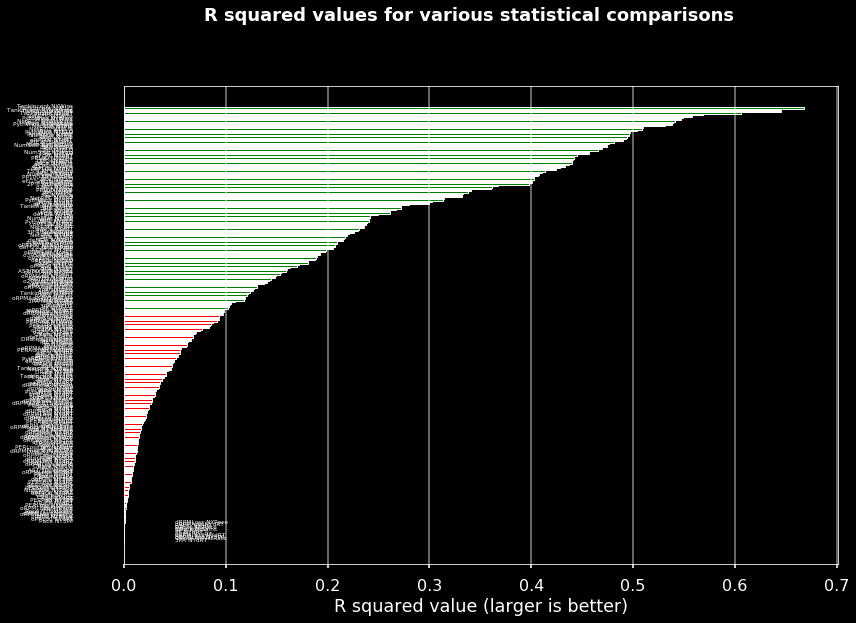

In [100]:
plt.style.use('seaborn-poster')

compareStatsTeamsNBA, ax = plt.subplots()

statsGraph = []
for i in rSquareArr:
    statsGraph.append(float(i))
combinedStats = [[i,j,k] for i,j,k in zip(statsGraph,oldNBAUse,theseNBAUse)]


sortedRSquared = sorted(combinedStats, key = itemgetter(0))
print(sortedRSquared)

sortedRSquaredData = [row[0] for row in sortedRSquared]
y_pos = np.arange(len(sortedRSquaredData))

colorList = []

for i in sortedRSquaredData:
    if i < 0.1:
        colorList.append('red')
    elif i > 0.1:
        colorList.append('green')
        
ax.barh(y_pos,sortedRSquaredData,color = colorList, edgeColor = 'white', linewidth=1)

labels = [row[1]+' '+row[2] for row in sortedRSquared]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .05, height, label, ha='left', fontsize = 'xx-small', va='bottom', color = 'white')
    elif rect.get_y() >=11:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize = 'xx-small',color='white')

compareStatsTeamsNBA.suptitle("R squared values for various statistical comparisons", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("R squared value (larger is better)")
ax.grid(alpha = .5)
#compareStatsTeams.savefig('fantasyGraphs/RBRSquared.png', dpi = 400, bbox_inches = 'tight')

In [113]:
train, test = train_test_split(dfOldNBATeams, test_size = 0.25, random_state = 42)

xtrainTeamNBA = train[['Wins','PythWins','PF','PA', '2PA', '2P%', '3PA', '3P%', 'o2P%', 'o3P%', 'PP100', 'oPP100', 'Age', 'DRate', 'ORate', 'Pace', 'eFG%', 'deFG%', 'NetRTG', 'PIE', 'AST/TO', 'TS%', 'PERAdd', 'PERLoss', 'oRPMAdd', 'dRPMadd', 'oRPMLoss', 'dRPMLoss', 'TankIncent', 'NumStar']]
ytrainTeamNBA = train[['NYWins']].astype(int)

xtestTeamNBA = test[['Wins','PythWins','PF','PA', '2PA', '2P%', '3PA', '3P%', 'o2P%', 'o3P%', 'PP100', 'oPP100', 'Age', 'DRate', 'ORate', 'Pace', 'eFG%', 'deFG%', 'NetRTG', 'PIE', 'AST/TO', 'TS%', 'PERAdd', 'PERLoss', 'oRPMAdd', 'dRPMadd', 'oRPMLoss', 'dRPMLoss', 'TankIncent', 'NumStar']]
ytestTeamNBA = test[['NYWins']].astype(int)

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(xtrainRB,ytrainRB)
#knn.score(xtestRB,ytestRB)
#print(knn.kneighbors(xtrain, return_distance=False))

In [114]:
linRegTeamNBA = linear_model.LinearRegression(fit_intercept = False)
linRegTeamNBA.fit(xtrainTeamNBA,ytrainTeamNBA)

y_predLinTeamNBA = linRegTeamNBA.predict(xtestTeamNBA)
linR2TeamNBA = abs(1/r2_score(ytestTeamNBA,y_predLinTeamNBA))
print("Mean squared error: %.3f"%mean_squared_error(ytestTeamNBA, y_predLinTeamNBA))
print("Variance score: %.3f"%r2_score(ytestTeamNBA,y_predLinTeamNBA))

cvScoreLinTeamNBA = cross_val_score(linRegTeamNBA,xtestTeamNBA,ytestTeamNBA,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLinTeamNBA.mean(), cvScoreLinTeamNBA.std()*2))
print(linR2TeamNBA)

Mean squared error: 71.945
Variance score: -0.264
Accuracy (cross validation score): -2.40 (+/- 4.78)
3.7927167204631065


In [115]:
ridgeRegTeamNBA = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeRegTeamNBA.fit(xtrainTeamNBA,ytrainTeamNBA)

y_predRidgeTeamNBA = ridgeRegTeamNBA.predict(xtestTeamNBA)
ridgeR2TeamNBA = abs(1/r2_score(ytestTeamNBA,y_predRidgeTeamNBA))
print("Mean squared error: %.3f"%mean_squared_error(ytestTeamNBA, y_predRidgeTeamNBA))
print("Variance score: %.3f"%r2_score(ytestTeamNBA,y_predRidgeTeamNBA))

cvScoreRidgeTeamNBA = cross_val_score(ridgeRegTeamNBA,xtestTeamNBA,ytestTeamNBA,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidgeTeamNBA.mean(), cvScoreRidgeTeamNBA.std()*2))
print(ridgeR2TeamNBA)

Mean squared error: 64.959
Variance score: -0.141
Accuracy (cross validation score): -0.75 (+/- 3.46)
7.094232161772783


In [116]:
lassoRegTeamNBA = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoRegTeamNBA.fit(xtrainTeamNBA,ytrainTeamNBA)

y_predLassoTeamNBA = lassoRegTeamNBA.predict(xtestTeamNBA)
lassoR2TeamNBA = abs(1/r2_score(ytestTeamNBA,y_predLassoTeamNBA))

print("Mean squared error: %.3f"%mean_squared_error(ytestTeamNBA, y_predLassoTeamNBA))
print("Variance score: %.3f"%r2_score(ytestTeamNBA,y_predLassoTeamNBA))

cvScoreLassoNBA = cross_val_score(lassoRegTeamNBA,xtestTeamNBA,ytestTeamNBA,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLassoNBA.mean(), cvScoreLassoNBA.std()*2))

Mean squared error: 58.621
Variance score: -0.030
Accuracy (cross validation score): -0.95 (+/- 3.41)


In [117]:
logRegTeamNBA = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logRegTeamNBA.fit(xtrainTeamNBA,ytrainTeamNBA)

y_predLogTeamNBA = logRegTeamNBA.predict(xtestTeamNBA)

print("Mean squared error: %.3f"%mean_squared_error(ytestTeamNBA, y_predLogTeamNBA))
print("Variance score: %.3f"%r2_score(ytestTeamNBA,y_predLogTeamNBA))

Mean squared error: 87.933
Variance score: -0.544


C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
linear_nba = linRegTeamNBA.predict(NBATeamsTest)
for i,j in zip(linear_nba, NBATeamsNames):
    print(i,j)

[19.73565441] Hawks
[62.7114285] Celtics
[13.79286748] Nets
[21.21189933] Hornets
[14.49969799] Bulls
[39.32471957] Cavaliers
[12.79444941] Mavericks
[38.78398805] Nuggets
[32.23810762] Pistons
[67.10838511] Warriors
[54.83396398] Rockets
[49.9370567] Pacers
[46.2955141] Clippers
[51.44670118] Lakers
[34.55828217] Grizzlies
[41.63700779] Heat
[60.17798465] Bucks
[42.2965291] Timberwolves
[55.49542041] Pelicans
[34.59810378] Knicks
[36.09702014] Thunder
[25.93846064] Magic
[53.60564399] 76ers
[36.68562845] Suns
[53.11883341] Trail Blazers
[46.99103054] Kings
[46.72642584] Spurs
[67.42767871] Raptors
[48.02382194] Jazz
[39.11560095] Wizards


In [119]:
ridge_nba = ridgeRegTeamNBA.predict(NBATeamsTest)
for i,j in zip(ridge_nba, NBATeamsNames):
    print(i,j)

[27.39000491] Hawks
[62.76918324] Celtics
[26.93285593] Nets
[36.55375284] Hornets
[24.31272087] Bulls
[36.8955914] Cavaliers
[26.16298985] Mavericks
[43.79580441] Nuggets
[37.40165295] Pistons
[61.26526122] Warriors
[55.5767136] Rockets
[46.87285802] Pacers
[38.93253543] Clippers
[46.89033771] Lakers
[31.21867385] Grizzlies
[39.56549184] Heat
[48.46706022] Bucks
[43.44222577] Timberwolves
[48.43903378] Pelicans
[24.86650453] Knicks
[40.62383915] Thunder
[27.8772595] Magic
[51.20984397] 76ers
[29.38044257] Suns
[52.16234285] Trail Blazers
[34.75258571] Kings
[48.24293652] Spurs
[57.16943028] Raptors
[53.10642273] Jazz
[43.0364721] Wizards


In [120]:
lasso_nba = lassoRegTeamNBA.predict(NBATeamsTest)
for i,j in zip(lasso_nba, NBATeamsNames):
    print(i,j)

27.600641304684036 Hawks
54.81310657350068 Celtics
29.33317627518674 Nets
35.23079056787521 Hornets
31.48515180497872 Bulls
45.812398674093856 Cavaliers
26.340602332793896 Mavericks
45.724601218735955 Nuggets
39.83553174749456 Pistons
55.19272851561662 Warriors
59.645125638688874 Rockets
47.98795796624948 Pacers
41.94641847292691 Clippers
36.396528444619655 Lakers
24.29283658008348 Grizzlies
44.69655969347868 Heat
44.43686682140877 Bucks
46.041178790551406 Timberwolves
47.28961898674648 Pelicans
29.498048636560654 Knicks
47.35576750556738 Thunder
27.790412955680768 Magic
49.13216951436765 76ers
26.449973285732174 Suns
47.678273135783066 Trail Blazers
31.897990890391714 Kings
44.2814296223354 Spurs
55.50134019452416 Raptors
45.96148766534272 Jazz
42.69111178008672 Wizards


In [121]:
log_nba = logRegTeamNBA.predict(NBATeamsTest)
for i,j in zip(log_nba, NBATeamsNames):
    print(i,j)

55 Hawks
37 Celtics
55 Nets
42 Hornets
25 Bulls
27 Cavaliers
55 Mavericks
41 Nuggets
37 Pistons
48 Warriors
55 Rockets
37 Pacers
41 Clippers
48 Lakers
27 Grizzlies
33 Heat
49 Bucks
59 Timberwolves
49 Pelicans
29 Knicks
41 Thunder
55 Magic
48 76ers
35 Suns
41 Trail Blazers
35 Kings
48 Spurs
48 Raptors
33 Jazz
48 Wizards


In [122]:
averageProdTeamsNBA = []
for i,j,h in zip(linear_nba,ridge_nba,lasso_nba):
    averageProdTeamsNBA.append(float((i*linR2TeamNBA+j*ridgeR2TeamNBA+h*lassoR2TeamNBA)/(linR2TeamNBA+ridgeR2TeamNBA+lassoR2TeamNBA)))

combinedAvgTeam = [[i,j] for i,j in zip(NBATeamsNames, averageProdTeamsNBA)]

sortedAvgTeams = sorted(combinedAvgTeam, key = itemgetter(1))
print(sortedAvgTeams)

[['Mavericks', 25.160761799527016], ['Grizzlies', 26.266847654206675], ['Hawks', 26.898521701487084], ['Nets', 27.630361634847223], ['Magic', 27.646783121720404], ['Suns', 27.78612602080699], ['Bulls', 28.9006412886581], ['Knicks', 29.19513129248426], ['Kings', 33.6350186152434], ['Hornets', 34.24937596099176], ['Pistons', 38.80262823693313], ['Lakers', 39.34466606613212], ['Clippers', 41.83689322013075], ['Wizards', 42.44206500313122], ['Heat', 43.62053865085328], ['Cavaliers', 43.842951127468346], ['Nuggets', 44.827851002296995], ['Spurs', 45.11922710433054], ['Timberwolves', 45.30956133205838], ['Thunder', 45.32814753268834], ['Bucks', 46.41592802718574], ['Jazz', 47.2729686402881], ['Pacers', 47.97633818226864], ['Pelicans', 48.169992605198296], ['Trail Blazers', 48.85382775499347], ['76ers', 49.84285504680986], ['Celtics', 56.7497057818836], ['Raptors', 56.78048481506416], ['Warriors', 57.17134004525113], ['Rockets', 58.58917405187091]]
